In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('case.csv', sep=';',encoding='cp1251')

In [68]:
data

,case,stage,start_time,end_time
0,77654086061,Заказ оформлен,05.10.2022 17:57,05.10.2022 17:57
1,77654086061,Поступление заказа сборщику,05.10.2022 17:57,05.10.2022 17:58
2,77654086061,Сборка заказа,05.10.2022 17:58,05.10.2022 18:22
3,77654086061,Упаковка товара,05.10.2022 18:22,05.10.2022 18:24
4,77654086061,Оплата,05.10.2022 18:24,05.10.2022 18:24
...,...,...,...,...
179025,86369405113,Передача товара курьеру,02.12.2022 9:00,02.12.2022 9:03
179026,86369405113,Доставка заказа,02.12.2022 9:03,02.12.2022 9:36
179027,86369405113,Проверка заказа,02.12.2022 9:36,02.12.2022 9:38
179028,86369405113,Отмена заказа,02.12.2022 9:38,02.12.2022 9:38


In [69]:
data.isna().sum()

case          0
stage         0
start_time    0
end_time      0
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179030 entries, 0 to 179029
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   case        179030 non-null  int64 
 1   stage       179030 non-null  object
 2   start_time  179030 non-null  object
 3   end_time    179030 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.5+ MB


In [71]:
data_case = data.case.unique()
len(data_case)

19988

In [72]:
data_stage = data.stage.unique()
data_stage

array(['Заказ оформлен', 'Поступление заказа сборщику', 'Сборка заказа',
       'Упаковка товара', 'Оплата', 'Отмена заказа',
       'Передача товара курьеру', 'Доставка заказа', 'Проверка заказа',
       'Заказ доставлен', 'Звонок клиенту'], dtype=object)

In [73]:
stage_priority ={
    'Заказ оформлен': 0,
    'Поступление заказа сборщику': 1,
    'Сборка заказа': 2,
    'Звонок клиенту': 3,
    'Упаковка товара': 4,
    'Оплата': 5, 
    'Передача товара курьеру': 6, 
    'Доставка заказа': 7,
    'Проверка заказа': 8,
    'Заказ доставлен':9,
    'Отмена заказа':10
}
all_stages = len(list(set(list(data['case']))))
data['stage_priority'] = data['stage'].map(stage_priority)

In [74]:
data_stage_count = data.groupby('stage')['stage'].size()
print(data_stage_count)

stage
Доставка заказа                17870
Заказ доставлен                15100
Заказ оформлен                 19988
Звонок клиенту                  3690
Оплата                         20248
Отмена заказа                   4913
Передача товара курьеру        17870
Поступление заказа сборщику    20941
Проверка заказа                15557
Сборка заказа                  22806
Упаковка товара                20047
Name: stage, dtype: int64


## Время

In [75]:

data['duration'] = (pd.to_datetime(data['end_time'],format='%d.%m.%Y %H:%M')-pd.to_datetime(data['start_time'],format='%d.%m.%Y %H:%M'))
data['start_time'] = pd.to_datetime(data['start_time'],format='%d.%m.%Y %H:%M')
data['end_time'] = pd.to_datetime(data['end_time'],format='%d.%m.%Y %H:%M')
data

,case,stage,start_time,end_time,stage_priority,duration
0,77654086061,Заказ оформлен,2022-10-05 17:57:00,2022-10-05 17:57:00,0,0 days 00:00:00
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:00,2022-10-05 17:58:00,1,0 days 00:01:00
2,77654086061,Сборка заказа,2022-10-05 17:58:00,2022-10-05 18:22:00,2,0 days 00:24:00
3,77654086061,Упаковка товара,2022-10-05 18:22:00,2022-10-05 18:24:00,4,0 days 00:02:00
4,77654086061,Оплата,2022-10-05 18:24:00,2022-10-05 18:24:00,5,0 days 00:00:00
...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:00,2022-12-02 09:03:00,6,0 days 00:03:00
179026,86369405113,Доставка заказа,2022-12-02 09:03:00,2022-12-02 09:36:00,7,0 days 00:33:00
179027,86369405113,Проверка заказа,2022-12-02 09:36:00,2022-12-02 09:38:00,8,0 days 00:02:00
179028,86369405113,Отмена заказа,2022-12-02 09:38:00,2022-12-02 09:38:00,10,0 days 00:00:00


In [76]:
data['duration'].mean()

Timedelta('0 days 00:07:41.098475115')

In [77]:
data['duration'].max()

Timedelta('0 days 00:41:00')

In [78]:
data.sort_values(by='duration')

,case,stage,start_time,end_time,stage_priority,duration
0,77654086061,Заказ оформлен,2022-10-05 17:57:00,2022-10-05 17:57:00,0,0 days 00:00:00
84639,84561871344,Заказ оформлен,2022-12-19 12:09:00,2022-12-19 12:09:00,0,0 days 00:00:00
84638,28041111507,Заказ доставлен,2022-11-18 14:18:00,2022-11-18 14:18:00,9,0 days 00:00:00
84634,28041111507,Оплата,2022-11-18 13:42:00,2022-11-18 13:42:00,5,0 days 00:00:00
84630,28041111507,Заказ оформлен,2022-11-18 13:15:00,2022-11-18 13:15:00,0,0 days 00:00:00
...,...,...,...,...,...,...
166669,25690804597,Передача товара курьеру,2022-10-17 11:45:00,2022-10-17 12:26:00,6,0 days 00:41:00
105785,38251215748,Передача товара курьеру,2022-12-16 23:48:00,2022-12-17 00:29:00,6,0 days 00:41:00
474,12829975733,Передача товара курьеру,2022-11-10 23:20:00,2022-11-11 00:01:00,6,0 days 00:41:00
22882,54836561674,Передача товара курьеру,2022-11-15 10:39:00,2022-11-15 11:20:00,6,0 days 00:41:00


In [79]:
data[data['stage'].isin(['Заказ оформлен'])]

,case,stage,start_time,end_time,stage_priority,duration
0,77654086061,Заказ оформлен,2022-10-05 17:57:00,2022-10-05 17:57:00,0,0 days
8,40211944184,Заказ оформлен,2022-10-10 16:59:00,2022-10-10 16:59:00,0,0 days
16,80694742513,Заказ оформлен,2022-10-17 21:45:00,2022-10-17 21:45:00,0,0 days
24,77917019597,Заказ оформлен,2022-12-11 13:10:00,2022-12-11 13:10:00,0,0 days
34,36725590268,Заказ оформлен,2022-10-24 20:35:00,2022-10-24 20:35:00,0,0 days
...,...,...,...,...,...,...
178975,71024475446,Заказ оформлен,2022-12-09 18:09:00,2022-12-09 18:09:00,0,0 days
178988,75429342160,Заказ оформлен,2022-12-08 12:05:00,2022-12-08 12:05:00,0,0 days
179000,78244918485,Заказ оформлен,2022-12-06 22:27:00,2022-12-06 22:27:00,0,0 days
179010,80583587050,Заказ оформлен,2022-12-03 11:03:00,2022-12-03 11:03:00,0,0 days


In [80]:
df_cancel = data[data['case'].isin(list(data[data['stage'] == 'Звонок клиенту']['case']))]
df_cancel = df_cancel[df_cancel['case'].isin(df_cancel[df_cancel['stage_priority']==10]['case'])]
df_cancel[df_cancel['stage']=='Звонок клиенту']['case'].value_counts()

case
85660642999    4
44219047414    4
27054585500    4
54565626570    4
42461428239    4
              ..
64126215656    1
76819960647    1
71155333123    1
11210450948    1
75109019728    1
Name: count, Length: 1255, dtype: int64

In [81]:
df = data[data['case'].isin(data[data['stage']=='Звонок клиенту']['case'].drop_duplicates())]
df['case'].drop_duplicates()

141351    23654976392
141357    13133740380
141363    68533025030
141369    74192213064
141375    18541733816
             ...     
178347    81477185908
178838    38842563790
178860    44699404389
178962    70423983178
178975    71024475446
Name: case, Length: 2685, dtype: int64

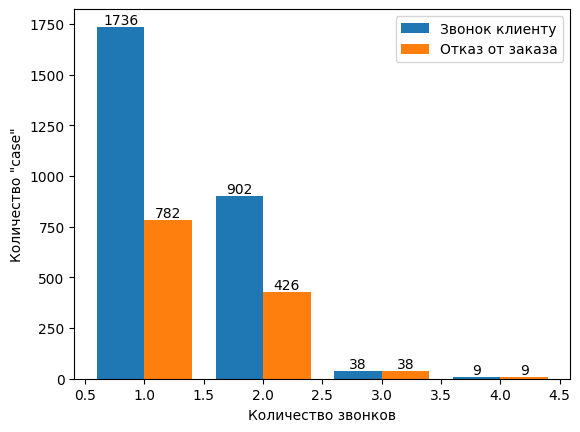

In [82]:
df_cancel = data[data['case'].isin(list(data[data['stage'] == 'Звонок клиенту']['case']))]

from collections import Counter
counts = list(data[data['stage'] == 'Звонок клиенту']['case'].value_counts())

df_cancel = data[data['case'].isin(list(data[data['stage'] == 'Звонок клиенту']['case']))]
df_cancel = df_cancel[df_cancel['case'].isin(df_cancel[df_cancel['stage_priority']==10]['case'])]
cancel_counts = list(df_cancel[df_cancel['stage']=='Звонок клиенту']['case'].value_counts())

occurrences = dict(Counter(counts))
cancel_occurrences = dict(Counter(cancel_counts))

fig, ax = plt.subplots()
bar1 = ax.bar([x - 0.2 for x in occurrences.keys()], occurrences.values(), width=0.4, align='center', label='Звонок клиенту')
bar2 = ax.bar([x + 0.2 for x in cancel_occurrences.keys()], cancel_occurrences.values(), width=0.4, align='center', label='Отказ от заказа')

for bar in bar1+bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0,
             yval,
             int(yval),
             va='bottom',  
             ha='center',  
             )

plt.xlabel('Количество звонков')
plt.ylabel('Количество "case"')
plt.legend()
plt.show()

In [83]:
for x in list(data['stage'].drop_duplicates()):
    print("Стадия: ", x)
    print("Среднее время:",data[data['stage'].isin([x])]['duration'].mean())
    print("Максимальное время:",data[data['stage'].isin([x])]['duration'].max())
    print()
    

Стадия:  Заказ оформлен
Среднее время: 0 days 00:00:05.337202321
Максимальное время: 0 days 00:01:00

Стадия:  Поступление заказа сборщику
Среднее время: 0 days 00:02:11.798863473
Максимальное время: 0 days 00:35:00

Стадия:  Сборка заказа
Среднее время: 0 days 00:23:46.677190213
Максимальное время: 0 days 00:25:00

Стадия:  Упаковка товара
Среднее время: 0 days 00:02:00.718311966
Максимальное время: 0 days 00:03:00

Стадия:  Оплата
Среднее время: 0 days 00:00:25.163966811
Максимальное время: 0 days 00:01:00

Стадия:  Отмена заказа
Среднее время: 0 days 00:00:04.787299002
Максимальное время: 0 days 00:01:00

Стадия:  Передача товара курьеру
Среднее время: 0 days 00:06:41.049804141
Максимальное время: 0 days 00:41:00

Стадия:  Доставка заказа
Среднее время: 0 days 00:32:34.935646334
Максимальное время: 0 days 00:35:00

Стадия:  Проверка заказа
Среднее время: 0 days 00:01:38.660410104
Максимальное время: 0 days 00:03:00

Стадия:  Заказ доставлен
Среднее время: 0 days 00:00:04.982781456
М

In [84]:
import pandas as pd

filtered_df = data[(data['stage_priority'] == 1) & (data['stage_priority'].shift(1) == 2)]

filtered_df

,case,stage,start_time,end_time,stage_priority,duration
165958,53730235079,Поступление заказа сборщику,2022-12-17 20:40:00,2022-12-17 20:41:00,1,0 days 00:01:00
165971,83601182045,Поступление заказа сборщику,2022-12-04 08:25:00,2022-12-04 08:26:00,1,0 days 00:01:00
165984,72696271882,Поступление заказа сборщику,2022-12-21 19:15:00,2022-12-21 19:16:00,1,0 days 00:01:00
165997,32535040178,Поступление заказа сборщику,2022-11-07 18:26:00,2022-11-07 18:27:00,1,0 days 00:01:00
166006,17557530724,Поступление заказа сборщику,2022-11-01 15:53:00,2022-11-01 15:54:00,1,0 days 00:01:00
...,...,...,...,...,...,...
178322,34606232622,Поступление заказа сборщику,2022-10-24 10:56:00,2022-10-24 10:57:00,1,0 days 00:01:00
178329,79208839647,Поступление заказа сборщику,2022-10-31 22:01:00,2022-10-31 22:01:00,1,0 days 00:00:00
178336,20684924915,Поступление заказа сборщику,2022-11-19 16:55:00,2022-11-19 17:28:00,1,0 days 00:33:00
178343,48917151565,Поступление заказа сборщику,2022-11-04 11:20:00,2022-11-04 11:21:00,1,0 days 00:01:00


In [85]:
import matplotlib.pyplot as plt
duration_by_stage = data.groupby('stage')['duration'].mean()

print(duration_by_stage)

stage
Доставка заказа               0 days 00:32:34.935646334
Заказ доставлен               0 days 00:00:04.982781456
Заказ оформлен                0 days 00:00:05.337202321
Звонок клиенту                0 days 00:02:10.715447154
Оплата                        0 days 00:00:25.163966811
Отмена заказа                 0 days 00:00:04.787299002
Передача товара курьеру       0 days 00:06:41.049804141
Поступление заказа сборщику   0 days 00:02:11.798863473
Проверка заказа               0 days 00:01:38.660410104
Сборка заказа                 0 days 00:23:46.677190213
Упаковка товара               0 days 00:02:00.718311966
Name: duration, dtype: timedelta64[ns]


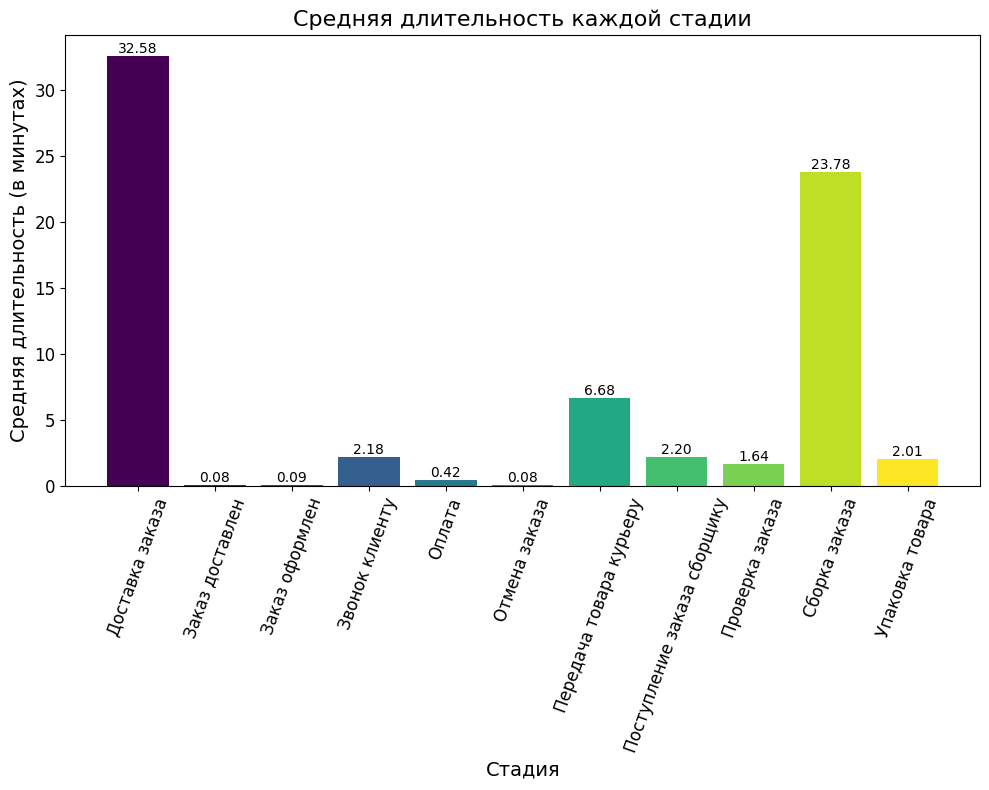

In [86]:
import matplotlib.pyplot as plt
import numpy as np
duration_by_stage = data.groupby('stage')['duration'].mean()
colors = plt.cm.viridis(np.linspace(0, 1, len(duration_by_stage)))
plt.figure(figsize=(10, 8))
plt.bar(duration_by_stage.index, duration_by_stage.dt.total_seconds() / 60, color=colors)
plt.xlabel('Стадия', fontsize=14)
plt.ylabel('Средняя длительность (в минутах)', fontsize=14)
plt.title('Средняя длительность каждой стадии', fontsize=16)
plt.xticks(rotation=70)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
for index, value in enumerate(duration_by_stage.dt.total_seconds() / 60):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()  
plt.show()


In [87]:
duration_by_stage = data.groupby('stage')['duration'].median()
duration_by_stage

stage
Доставка заказа               0 days 00:33:00
Заказ доставлен               0 days 00:00:00
Заказ оформлен                0 days 00:00:00
Звонок клиенту                0 days 00:02:00
Оплата                        0 days 00:00:00
Отмена заказа                 0 days 00:00:00
Передача товара курьеру       0 days 00:04:00
Поступление заказа сборщику   0 days 00:01:00
Проверка заказа               0 days 00:02:00
Сборка заказа                 0 days 00:24:00
Упаковка товара               0 days 00:02:00
Name: duration, dtype: timedelta64[ns]

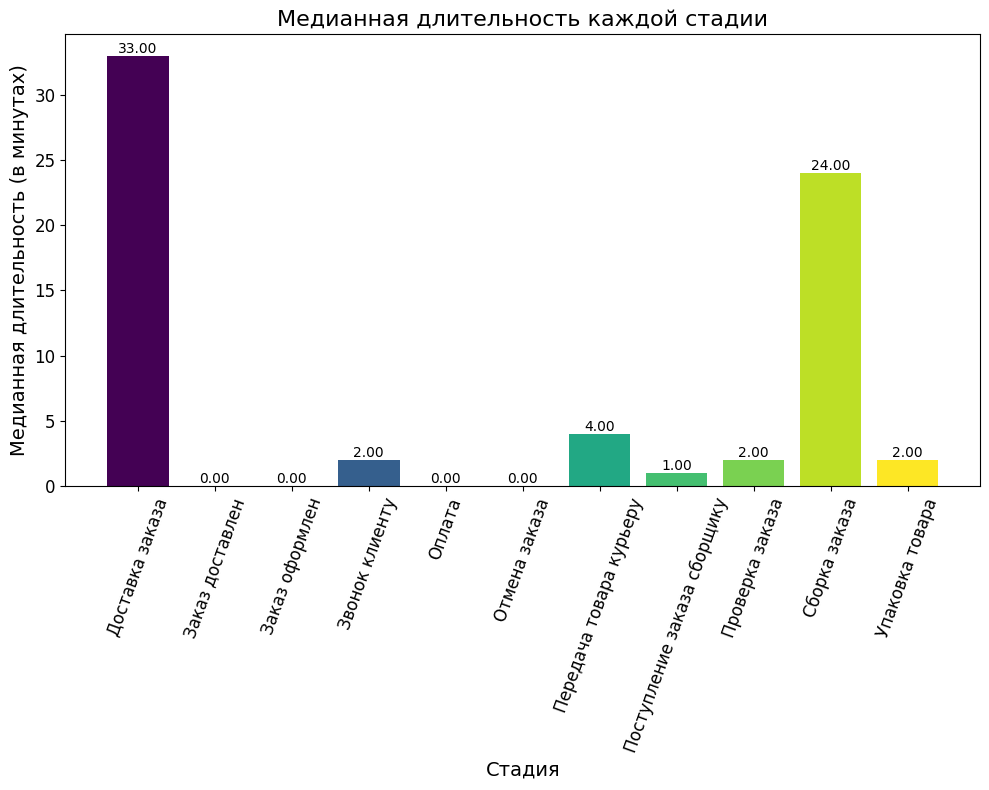

In [88]:

duration_by_stage = data.groupby('stage')['duration'].median()
colors = plt.cm.viridis(np.linspace(0, 1, len(duration_by_stage)))
plt.figure(figsize=(10, 8))
plt.bar(duration_by_stage.index, duration_by_stage.dt.total_seconds() / 60, color=colors)
plt.xlabel('Стадия', fontsize=14)
plt.ylabel('Медианная длительность (в минутах)', fontsize=14)
plt.title('Медианная длительность каждой стадии', fontsize=16)
plt.xticks(rotation=70)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
for index, value in enumerate(duration_by_stage.dt.total_seconds() / 60):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout() 
plt.show()


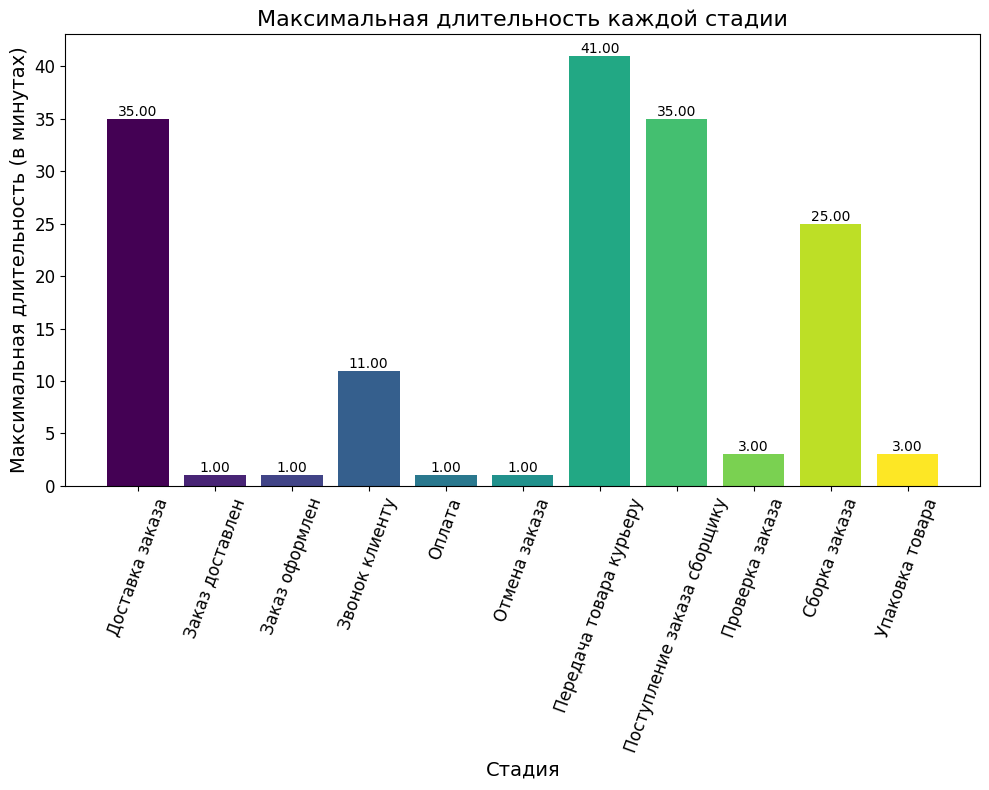

In [89]:

duration_by_stage = data.groupby('stage')['duration'].max()
colors = plt.cm.viridis(np.linspace(0, 1, len(duration_by_stage)))
plt.figure(figsize=(10, 8))
plt.bar(duration_by_stage.index, duration_by_stage.dt.total_seconds() / 60, color=colors)
plt.xlabel('Стадия', fontsize=14)
plt.ylabel('Максимальная длительность (в минутах)', fontsize=14)
plt.title('Максимальная длительность каждой стадии', fontsize=16)
plt.xticks(rotation=70)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
for index, value in enumerate(duration_by_stage.dt.total_seconds() / 60):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [90]:
duration_by_stage = data.groupby('stage')['duration'].max()
duration_by_stage

stage
Доставка заказа               0 days 00:35:00
Заказ доставлен               0 days 00:01:00
Заказ оформлен                0 days 00:01:00
Звонок клиенту                0 days 00:11:00
Оплата                        0 days 00:01:00
Отмена заказа                 0 days 00:01:00
Передача товара курьеру       0 days 00:41:00
Поступление заказа сборщику   0 days 00:35:00
Проверка заказа               0 days 00:03:00
Сборка заказа                 0 days 00:25:00
Упаковка товара               0 days 00:03:00
Name: duration, dtype: timedelta64[ns]

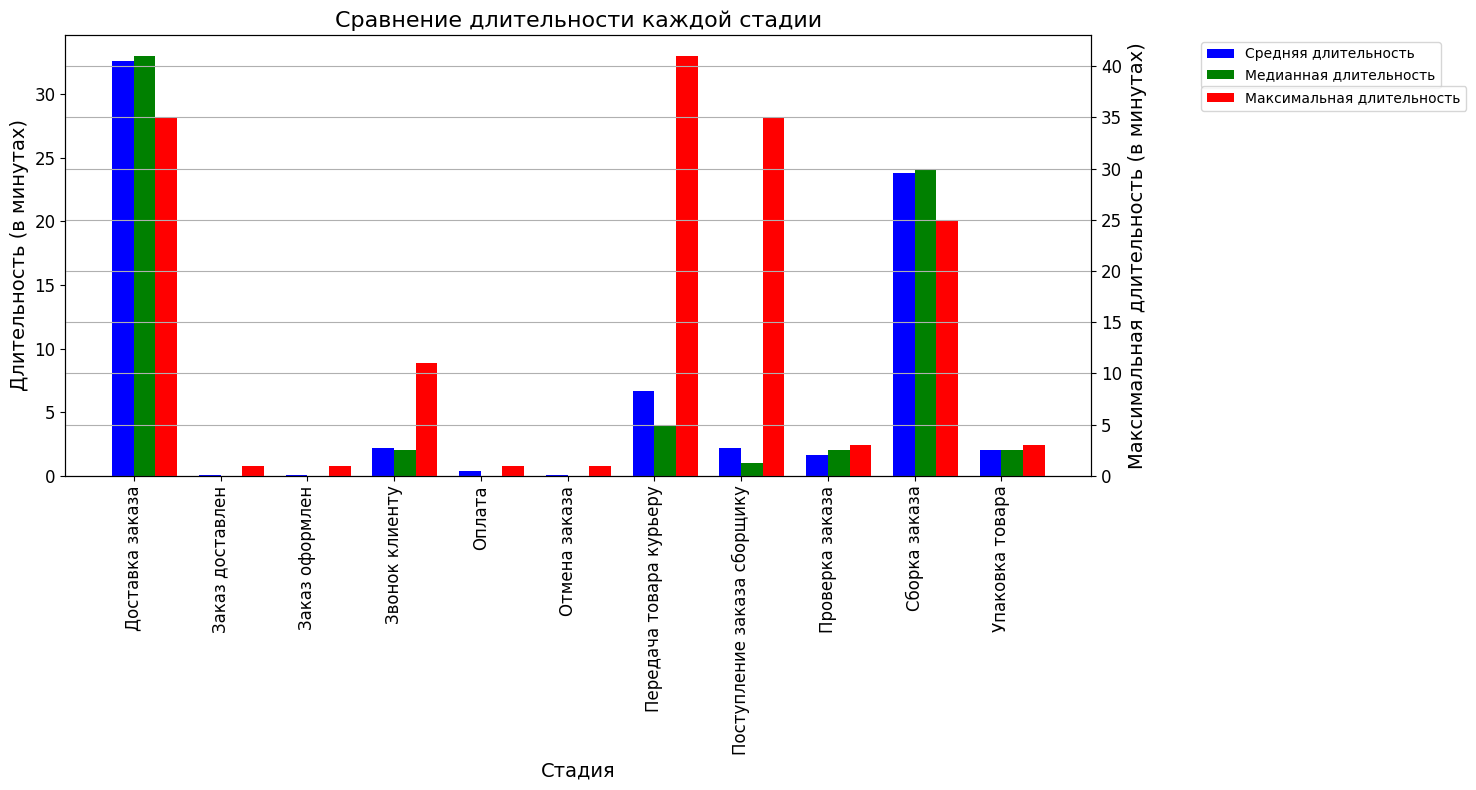

In [91]:
import matplotlib.pyplot as plt
import numpy as np

mean_duration_by_stage = data.groupby('stage')['duration'].mean()
median_duration_by_stage = data.groupby('stage')['duration'].median()
max_duration_by_stage = data.groupby('stage')['duration'].max()

fig, ax1 = plt.subplots(figsize=(15, 8))

colors = ['blue', 'green', 'red']  
bar_width = 0.25

indices = np.arange(len(mean_duration_by_stage))

ax1.bar(indices, mean_duration_by_stage.dt.total_seconds() / 60,
        bar_width, color=colors[0], label='Средняя длительность')

ax1.bar(indices + bar_width, median_duration_by_stage.dt.total_seconds() / 60,
        bar_width, color=colors[1], label='Медианная длительность')

ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1)) 

ax1.set_xticks(indices + bar_width / 2)
ax1.set_xticklabels(mean_duration_by_stage.index, rotation=90)
ax1.set_xlabel('Стадия', fontsize=14)
ax1.set_ylabel('Длительность (в минутах)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2 = ax1.twinx()  
ax2.bar(indices + 2*bar_width, max_duration_by_stage.dt.total_seconds() / 60,
        bar_width, color=colors[2], label='Максимальная длительность')

ax2.set_ylabel('Максимальная длительность (в минутах)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.9)) 

plt.title('Сравнение длительности каждой стадии', fontsize=16)

plt.tight_layout()
plt.grid(True)

plt.show()


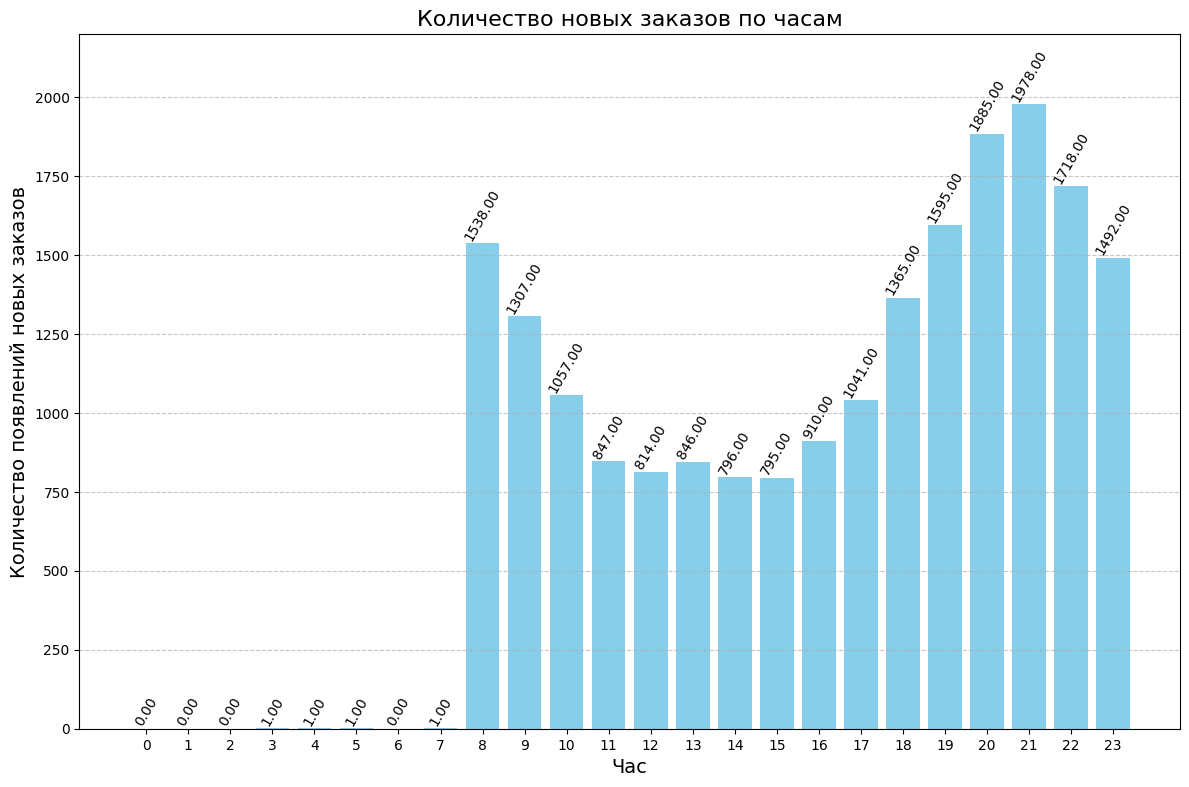

In [92]:
data['hour'] = data['start_time'].dt.hour

order_counts_hourly = data[data['stage'] == 'Заказ оформлен'].groupby('hour').size()

full_range = range(24)

order_counts_hourly = order_counts_hourly.reindex(full_range, fill_value=0)

plt.figure(figsize=(12, 8))
plt.bar(order_counts_hourly.index, order_counts_hourly, color='skyblue')

plt.title('Количество новых заказов по часам', fontsize=16)
plt.xlabel('Час', fontsize=14)
plt.ylabel('Количество появлений новых заказов', fontsize=14)
plt.xticks(range(24))
for index, value in enumerate(order_counts_hourly):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom',rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0,2200)

plt.show()


In [93]:
data['weekday'] = data['start_time'].dt.day_name()
data['hour'] = data['start_time'].dt.hour

order_counts_weekday_hourly = data[data['stage'] == 'Заказ оформлен'].groupby(['weekday', 'hour']).size()

print(order_counts_weekday_hourly)

weekday    hour
Friday     4         1
           8       225
           9       203
           10      172
           11      110
                  ... 
Wednesday  19      233
           20      262
           21      255
           22      282
           23      219
Length: 116, dtype: int64


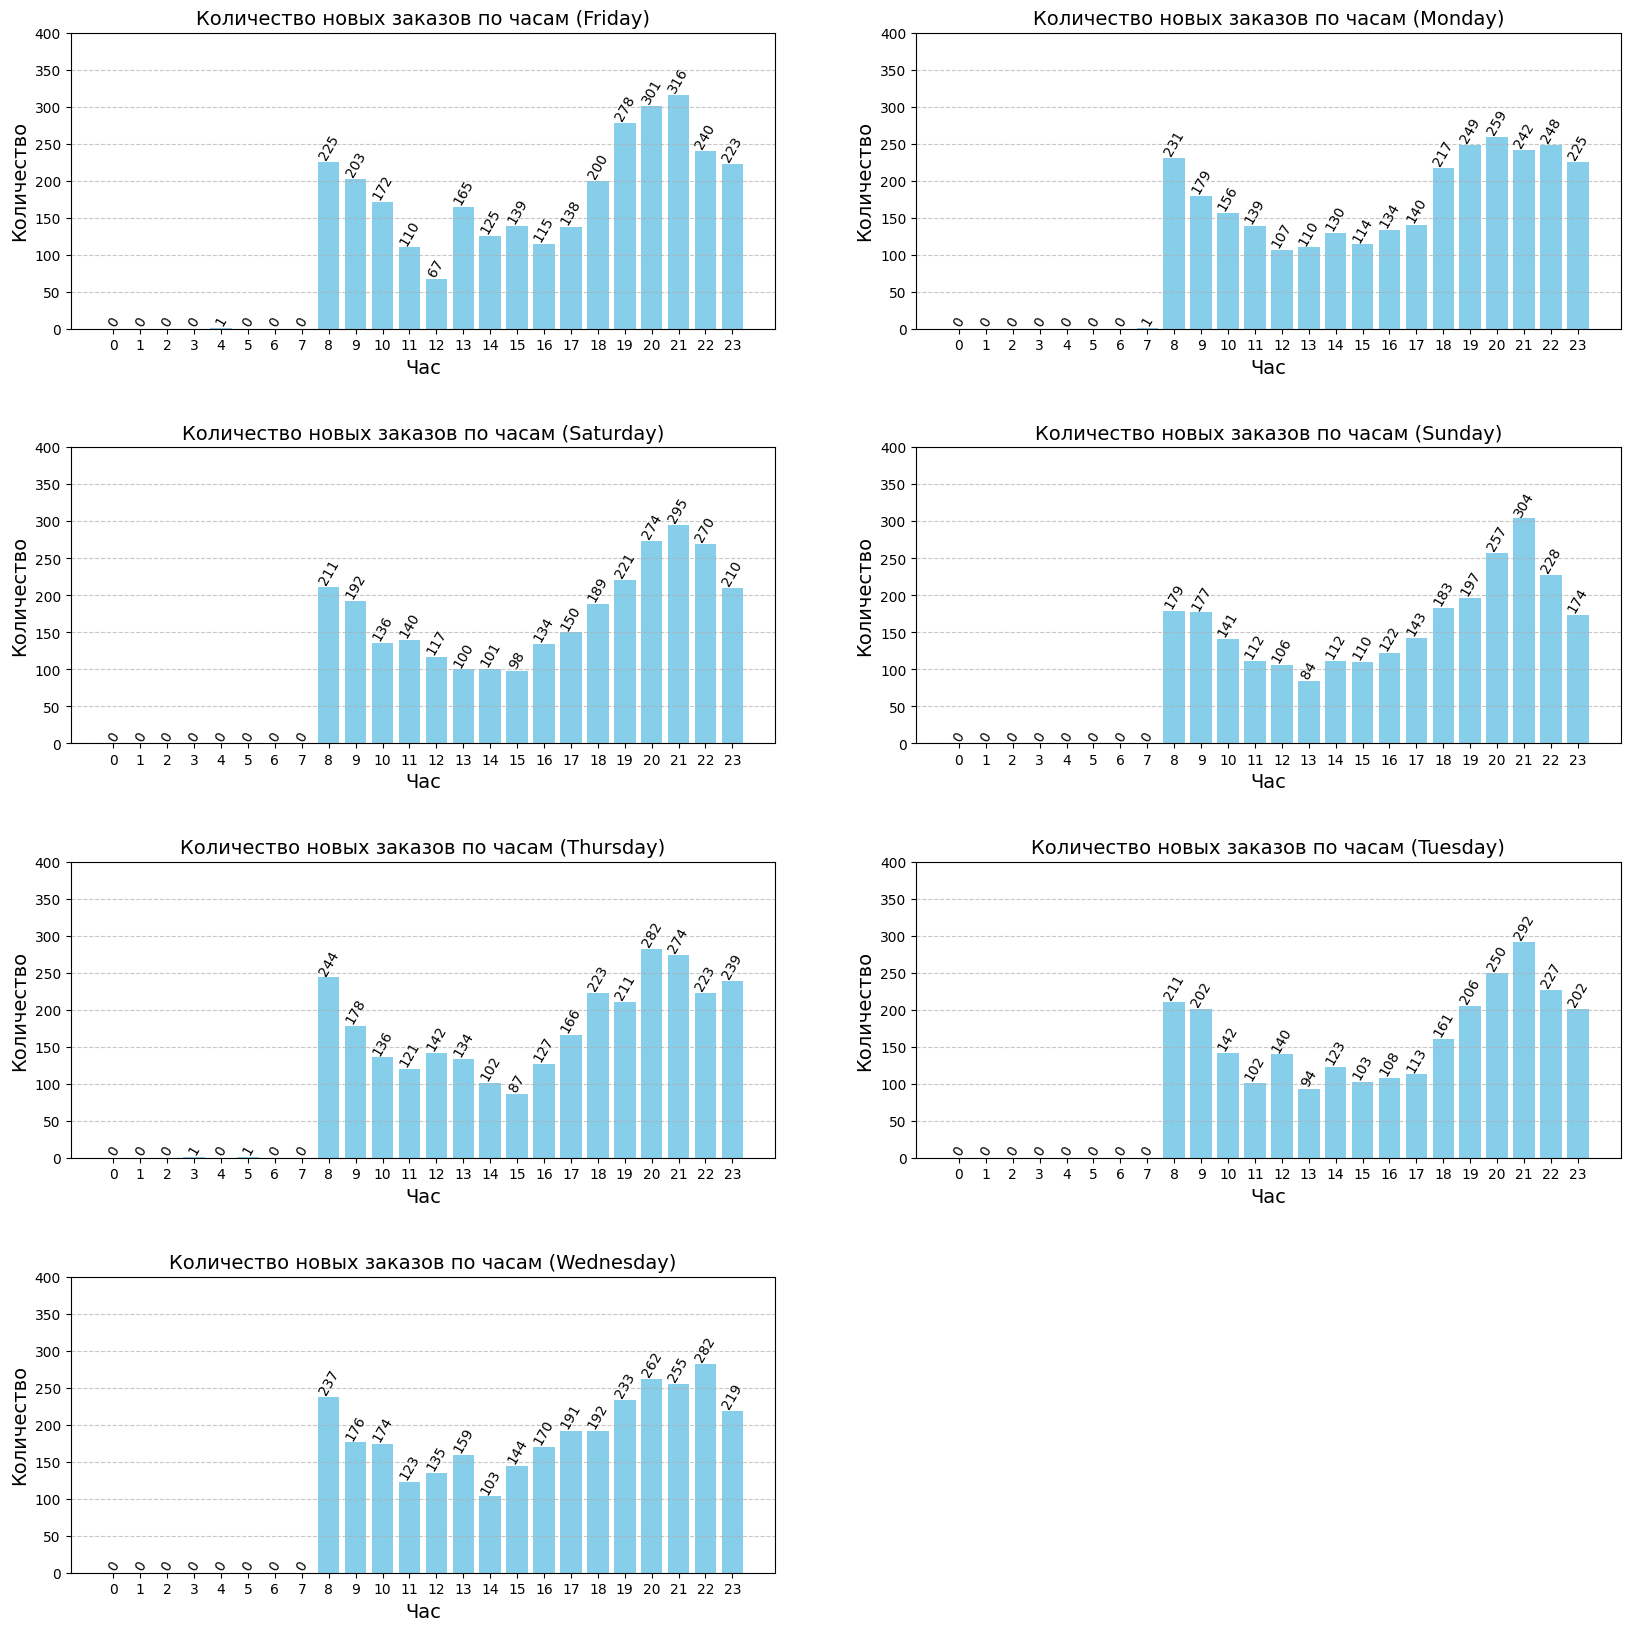

In [94]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20)) 
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for i, day in enumerate(sorted(data['weekday'].unique())):
    row = i // 2  
    col = i % 2  

    order_counts_hourly = data[(data['stage'] == 'Заказ оформлен') & (data['weekday'] == day)].groupby('hour').size()

    full_range = range(24)

    order_counts_hourly = order_counts_hourly.reindex(full_range, fill_value=0)

    ax = axs[row, col]
    ax.bar(order_counts_hourly.index, order_counts_hourly, color='skyblue')

    ax.set_title(f'Количество новых заказов по часам ({day})', fontsize=14)
    ax.set_xlabel('Час', fontsize=14)
    ax.set_ylabel('Количество', fontsize=14)
    ax.set_xticks(range(24))
    for index, value in enumerate(order_counts_hourly):
        ax.text(index, value, f'{value:.0f}', ha='center', va='bottom', rotation=60)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 400)


fig.delaxes(axs[3, 1])

plt.show()


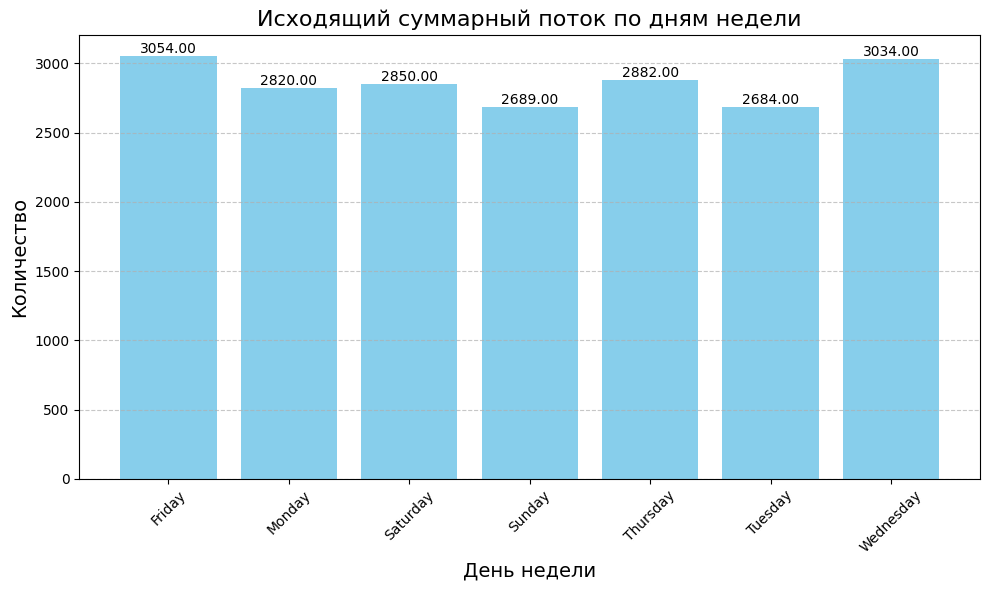

In [95]:
import matplotlib.pyplot as plt

order_counts = data[(data['stage'] == 'Заказ доставлен') | (data['stage'] == 'Отмена заказа')].groupby('weekday').size()

plt.figure(figsize=(10, 6))
plt.bar(order_counts.index, order_counts, color='skyblue')

plt.title('Исходящий суммарный поток по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(order_counts):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


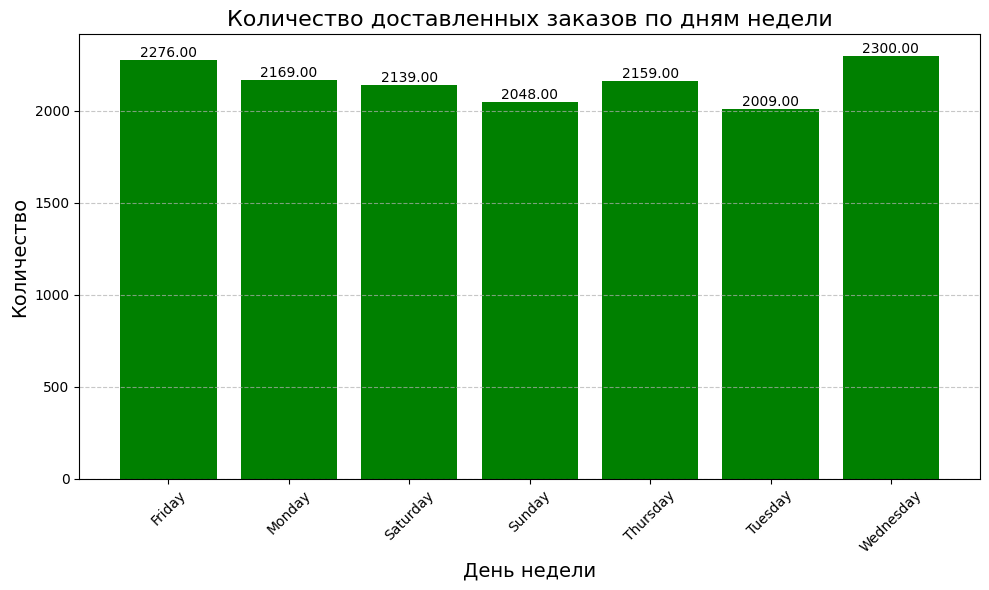

In [96]:
import matplotlib.pyplot as plt

order_counts = data[(data['stage'] == 'Заказ доставлен') ].groupby('weekday').size()

plt.figure(figsize=(10, 6))
plt.bar(order_counts.index, order_counts, color='green')

plt.title('Количество доставленных заказов по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(order_counts):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


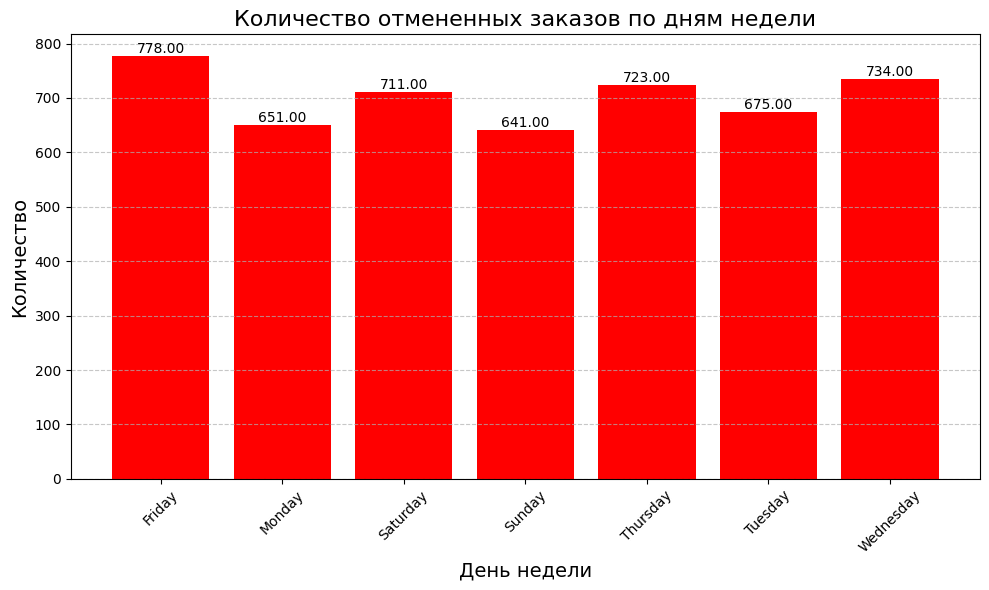

In [97]:
import matplotlib.pyplot as plt

order_counts = data[data['stage'] == 'Отмена заказа'].groupby('weekday').size()

plt.figure(figsize=(10, 6))
plt.bar(order_counts.index, order_counts, color='red')

plt.title('Количество отмененных заказов по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(order_counts):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


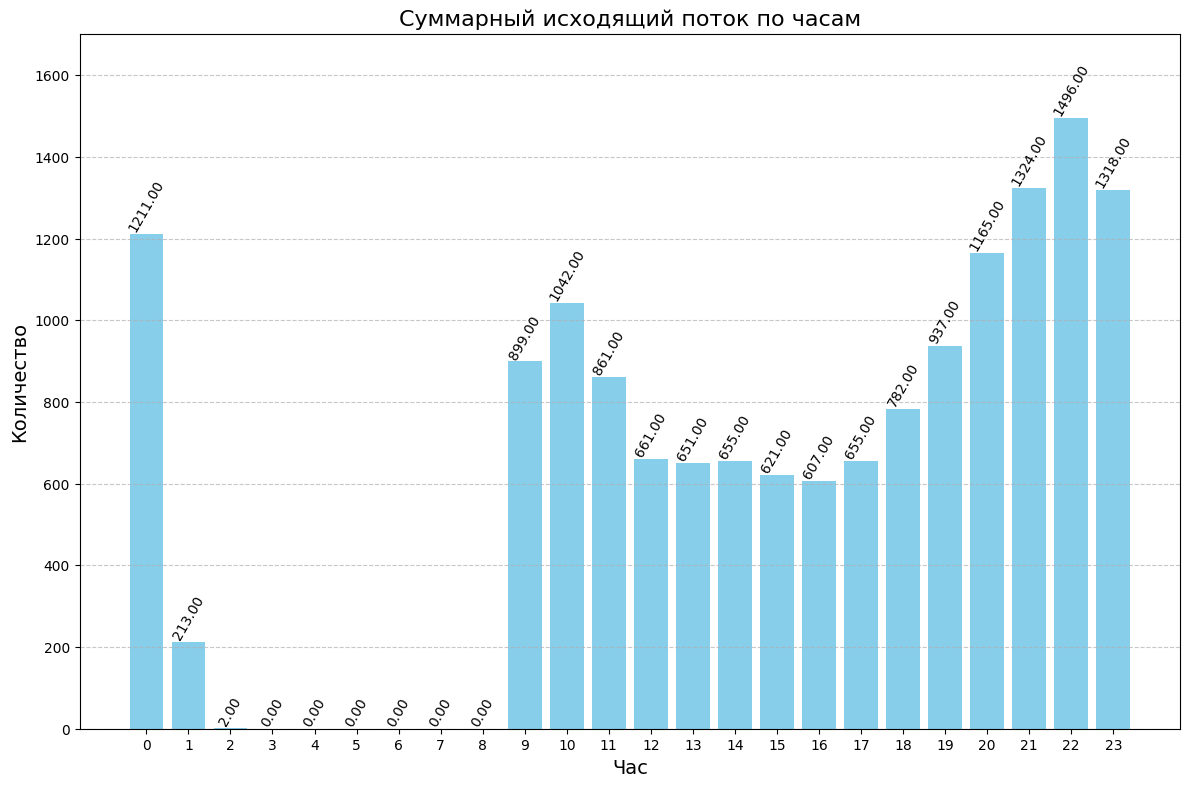

In [98]:
data['hour'] = data['start_time'].dt.hour

order_counts_hourly = data[(data['stage'] == 'Заказ доставлен') | (data['stage'] == 'Заказ отменен')].groupby('hour').size()

full_range = range(24)

order_counts_hourly = order_counts_hourly.reindex(full_range, fill_value=0)

plt.figure(figsize=(12, 8))
plt.bar(order_counts_hourly.index, order_counts_hourly, color='skyblue')

plt.title('Суммарный исходящий поток по часам', fontsize=16)
plt.xlabel('Час', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(range(24))
for index, value in enumerate(order_counts_hourly):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom',rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0,1700)

plt.show()


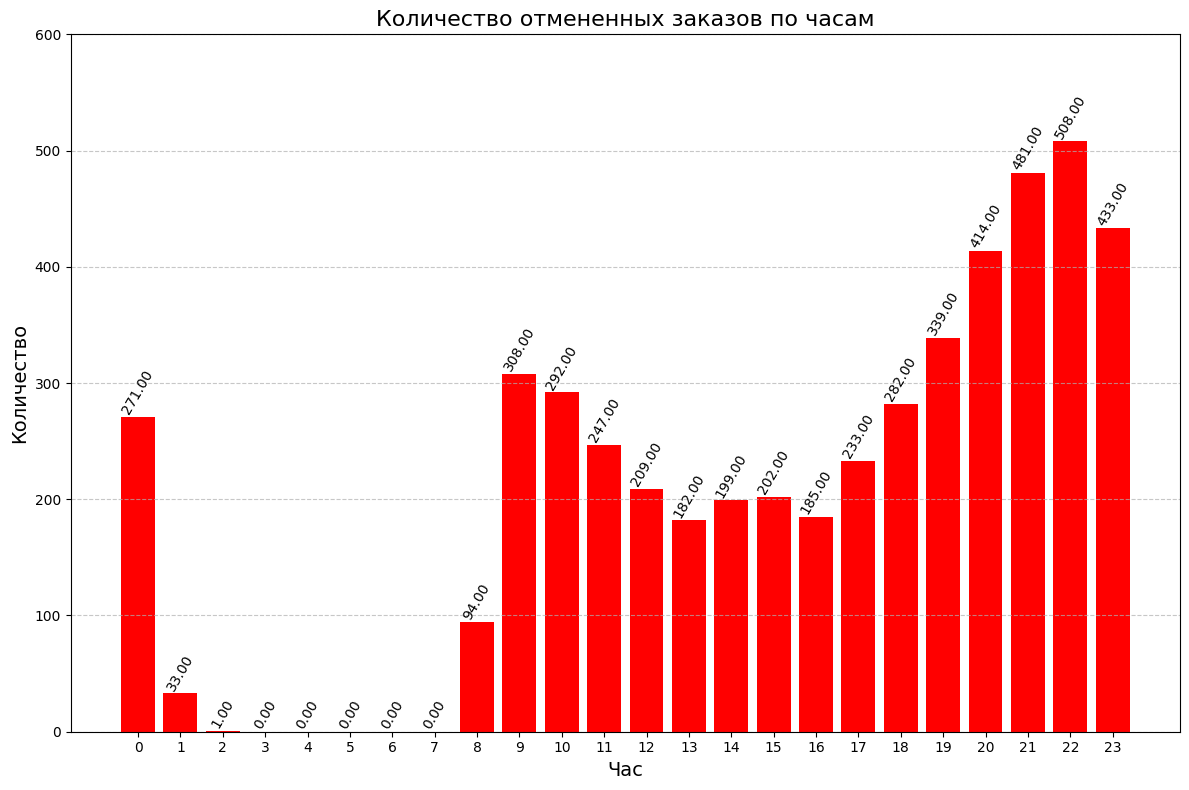

In [99]:
data['hour'] = data['start_time'].dt.hour

order_counts_hourly = data[data['stage'] == 'Отмена заказа'].groupby('hour').size()

full_range = range(24)

order_counts_hourly = order_counts_hourly.reindex(full_range, fill_value=0)

plt.figure(figsize=(12, 8))
plt.bar(order_counts_hourly.index, order_counts_hourly, color='red')

plt.title('Количество отмененных заказов по часам', fontsize=16)
plt.xlabel('Час', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(range(24))
for index, value in enumerate(order_counts_hourly):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom',rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0,600)

plt.show()


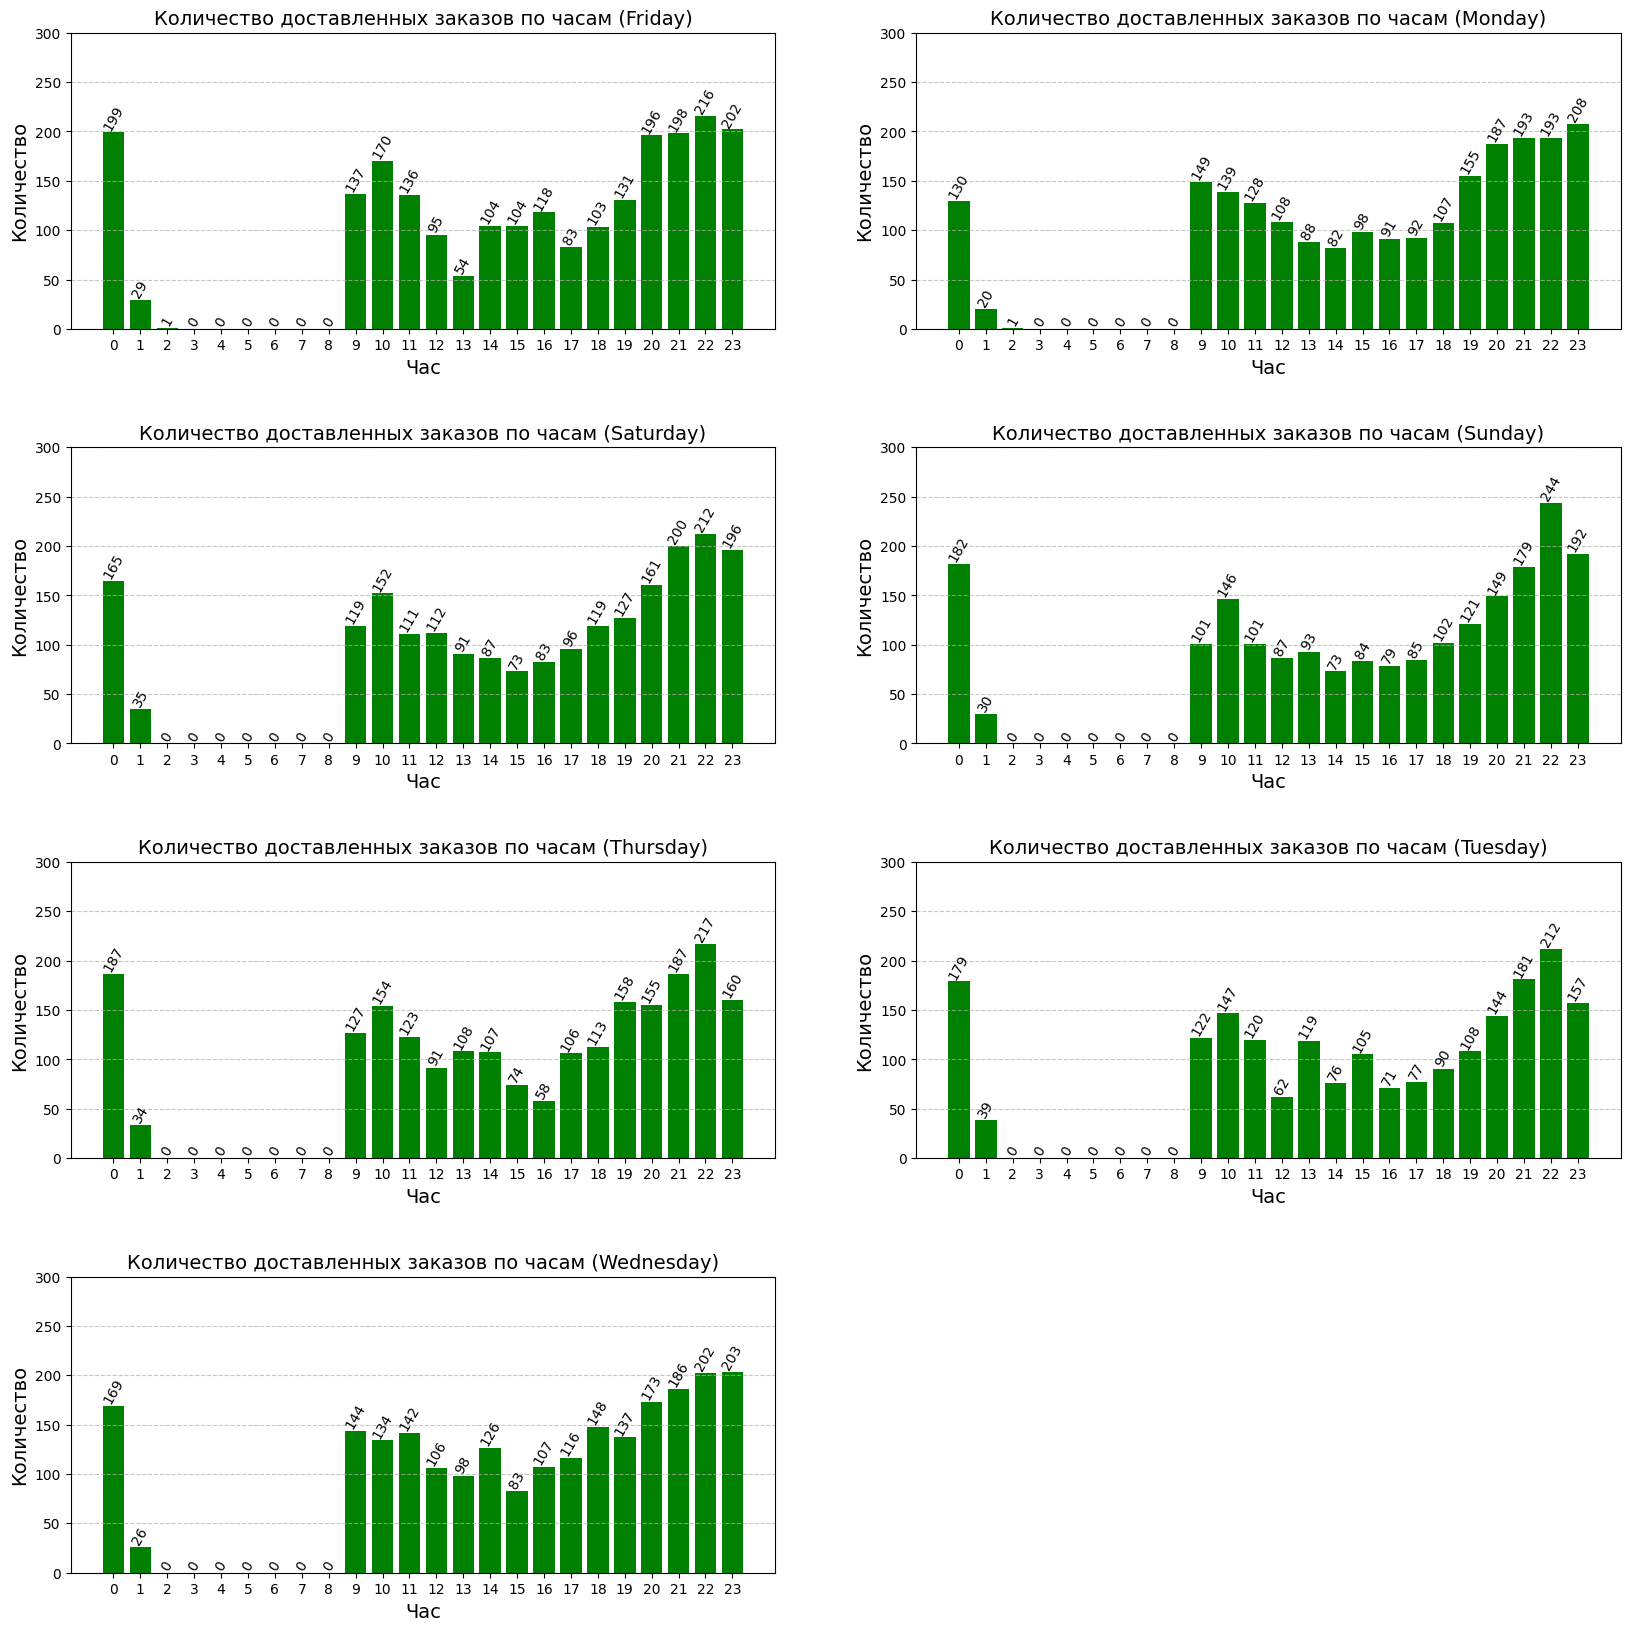

In [100]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20)) 
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for i, day in enumerate(sorted(data['weekday'].unique())):
    row = i // 2  
    col = i % 2  

    order_counts_hourly = data[(data['stage'] == 'Заказ доставлен') & (data['weekday'] == day)].groupby('hour').size()

    full_range = range(24)

    order_counts_hourly = order_counts_hourly.reindex(full_range, fill_value=0)

    ax = axs[row, col]
    ax.bar(order_counts_hourly.index, order_counts_hourly, color='green')

    ax.set_title(f'Количество доставленных заказов по часам ({day})', fontsize=14)
    ax.set_xlabel('Час', fontsize=14)
    ax.set_ylabel('Количество', fontsize=14)
    ax.set_xticks(range(24))
    for index, value in enumerate(order_counts_hourly):
        ax.text(index, value, f'{value:.0f}', ha='center', va='bottom', rotation=60)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 300)

fig.delaxes(axs[3, 1])

plt.show()


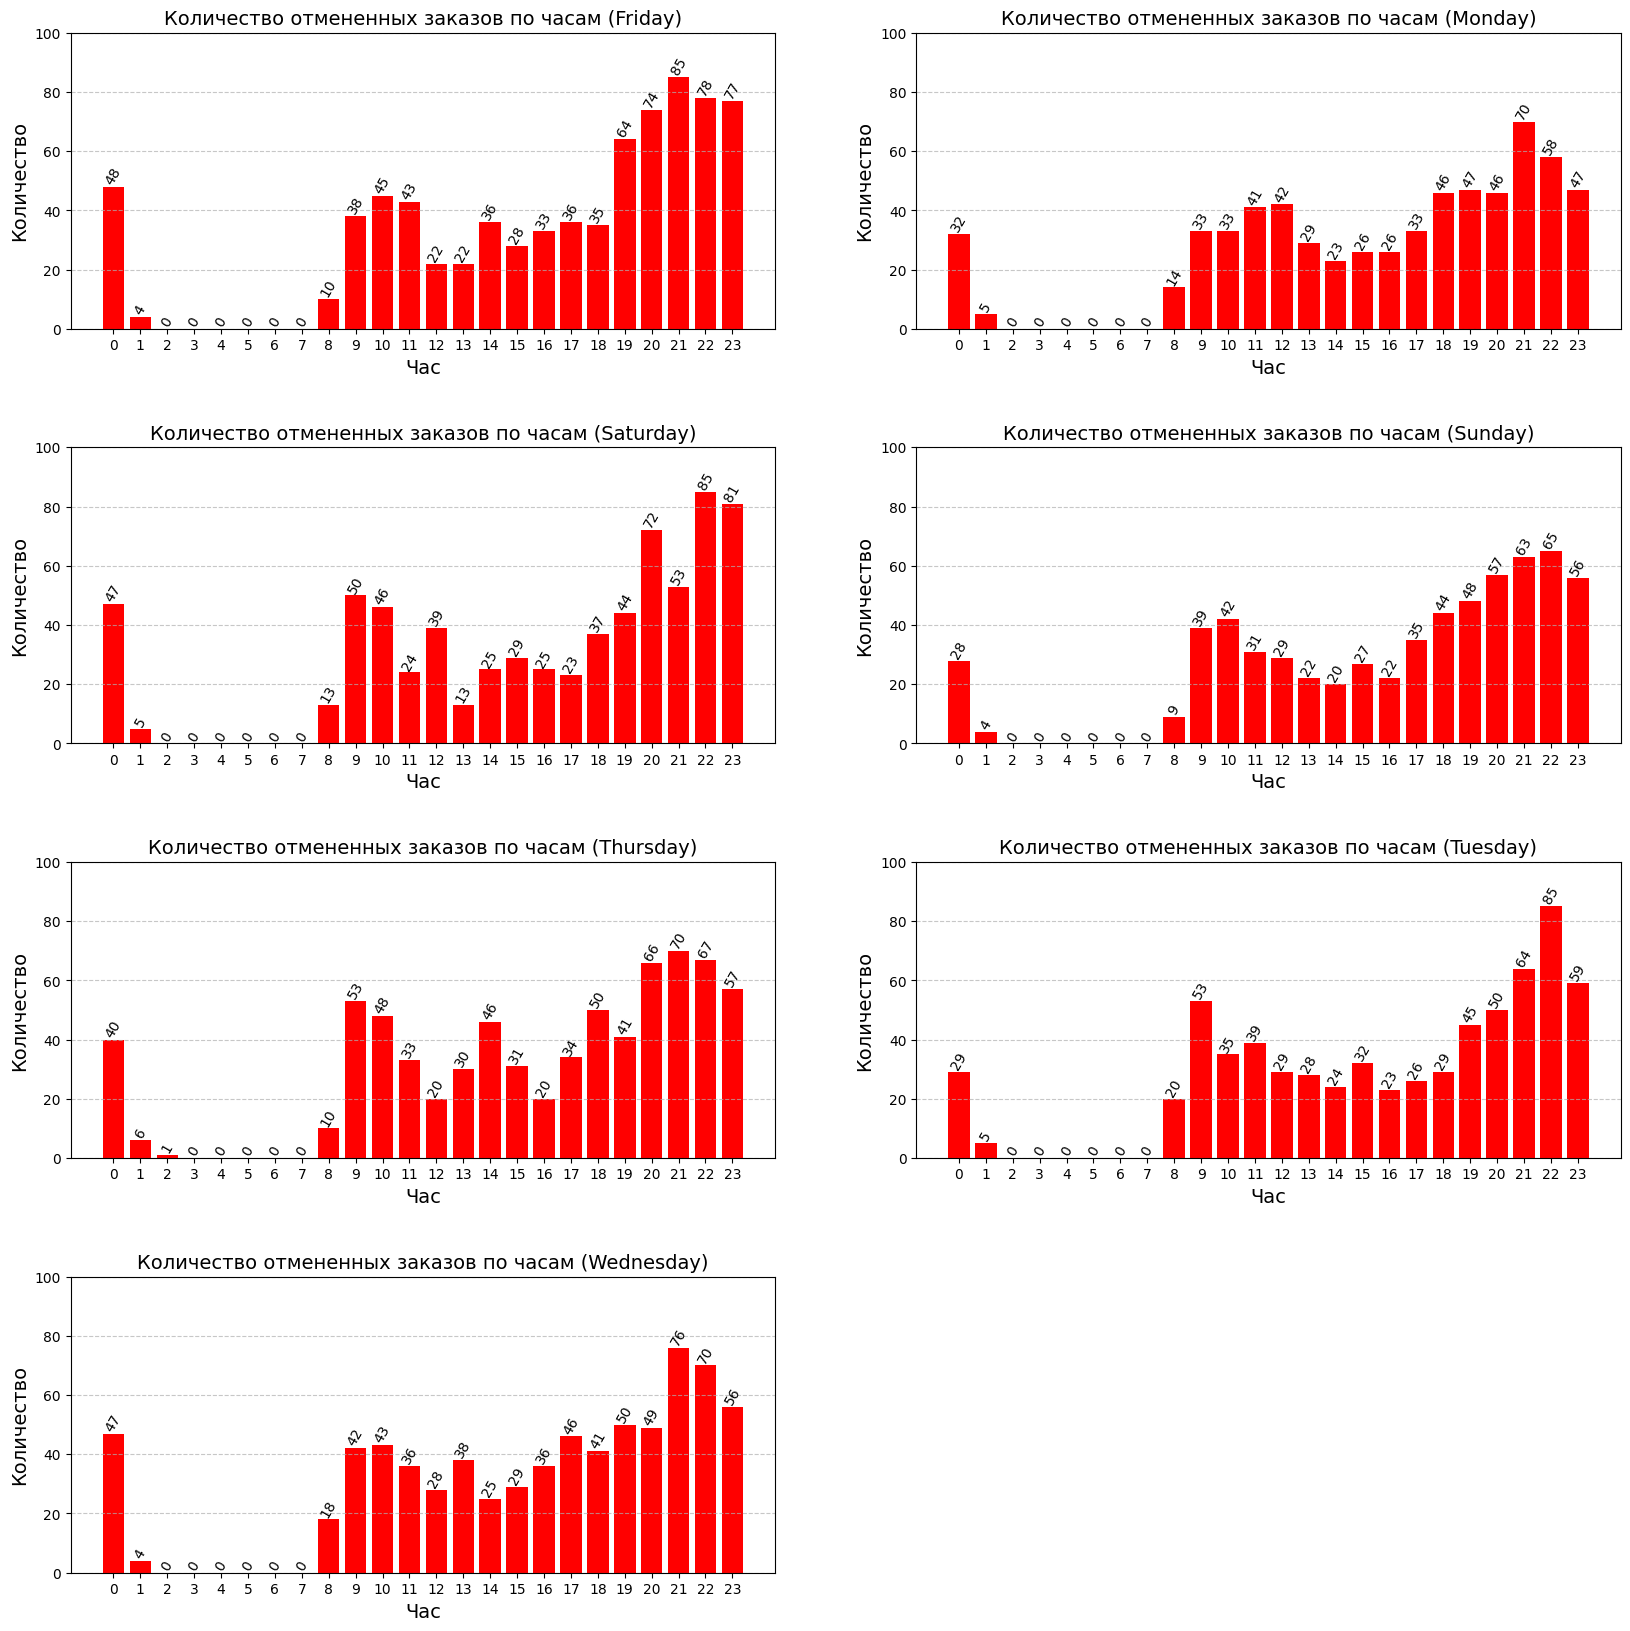

In [101]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20)) 
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for i, day in enumerate(sorted(data['weekday'].unique())):
    row = i // 2 
    col = i % 2  

    order_counts_hourly = data[(data['stage'] == 'Отмена заказа') & (data['weekday'] == day)].groupby('hour').size()

    full_range = range(24)

    order_counts_hourly = order_counts_hourly.reindex(full_range, fill_value=0)

    ax = axs[row, col]
    ax.bar(order_counts_hourly.index, order_counts_hourly, color='red')

    ax.set_title(f'Количество отмененных заказов по часам ({day})', fontsize=14)
    ax.set_xlabel('Час', fontsize=14)
    ax.set_ylabel('Количество', fontsize=14)
    ax.set_xticks(range(24))
    for index, value in enumerate(order_counts_hourly):
        ax.text(index, value, f'{value:.0f}', ha='center', va='bottom', rotation=60)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 100)


fig.delaxes(axs[3, 1])

plt.show()


## Звонок клиенту

In [102]:
data_call = data[(data['stage'] == 'Звонок клиенту')]
data_call

,case,stage,start_time,end_time,stage_priority,duration,hour,weekday
141354,23654976392,Звонок клиенту,2022-11-18 13:08:00,2022-11-18 13:08:00,3,0 days 00:00:00,13,Friday
141355,23654976392,Звонок клиенту,2022-11-18 13:08:00,2022-11-18 13:11:00,3,0 days 00:03:00,13,Friday
141360,13133740380,Звонок клиенту,2022-10-02 00:22:00,2022-10-02 00:23:00,3,0 days 00:01:00,0,Sunday
141361,13133740380,Звонок клиенту,2022-10-02 00:23:00,2022-10-02 00:25:00,3,0 days 00:02:00,0,Sunday
141366,68533025030,Звонок клиенту,2022-10-25 09:28:00,2022-10-25 09:28:00,3,0 days 00:00:00,9,Tuesday
...,...,...,...,...,...,...,...,...
178863,44699404389,Звонок клиенту,2022-12-02 23:10:00,2022-12-02 23:13:00,3,0 days 00:03:00,23,Friday
178965,70423983178,Звонок клиенту,2022-12-03 20:28:00,2022-12-03 20:29:00,3,0 days 00:01:00,20,Saturday
178966,70423983178,Звонок клиенту,2022-12-03 20:31:00,2022-12-03 20:34:00,3,0 days 00:03:00,20,Saturday
178978,71024475446,Звонок клиенту,2022-12-09 18:58:00,2022-12-09 18:58:00,3,0 days 00:00:00,18,Friday


In [103]:
data[(data['stage'] == 'Звонок клиенту') & (data['duration'] > pd.Timedelta(0))]

,case,stage,start_time,end_time,stage_priority,duration,hour,weekday
141355,23654976392,Звонок клиенту,2022-11-18 13:08:00,2022-11-18 13:11:00,3,0 days 00:03:00,13,Friday
141360,13133740380,Звонок клиенту,2022-10-02 00:22:00,2022-10-02 00:23:00,3,0 days 00:01:00,0,Sunday
141361,13133740380,Звонок клиенту,2022-10-02 00:23:00,2022-10-02 00:25:00,3,0 days 00:02:00,0,Sunday
141367,68533025030,Звонок клиенту,2022-10-25 09:28:00,2022-10-25 09:30:00,3,0 days 00:02:00,9,Tuesday
141373,74192213064,Звонок клиенту,2022-12-19 19:37:00,2022-12-19 19:40:00,3,0 days 00:03:00,19,Monday
...,...,...,...,...,...,...,...,...
178841,38842563790,Звонок клиенту,2022-12-05 19:02:00,2022-12-05 19:04:00,3,0 days 00:02:00,19,Monday
178863,44699404389,Звонок клиенту,2022-12-02 23:10:00,2022-12-02 23:13:00,3,0 days 00:03:00,23,Friday
178965,70423983178,Звонок клиенту,2022-12-03 20:28:00,2022-12-03 20:29:00,3,0 days 00:01:00,20,Saturday
178966,70423983178,Звонок клиенту,2022-12-03 20:31:00,2022-12-03 20:34:00,3,0 days 00:03:00,20,Saturday


In [104]:
data_with_call = data[data['case'].isin(list(set(list(data_call['case']))))]
data_with_call


,case,stage,start_time,end_time,stage_priority,duration,hour,weekday
141351,23654976392,Заказ оформлен,2022-11-18 12:43:00,2022-11-18 12:43:00,0,0 days 00:00:00,12,Friday
141352,23654976392,Поступление заказа сборщику,2022-11-18 12:43:00,2022-11-18 12:44:00,1,0 days 00:01:00,12,Friday
141353,23654976392,Сборка заказа,2022-11-18 12:44:00,2022-11-18 13:08:00,2,0 days 00:24:00,12,Friday
141354,23654976392,Звонок клиенту,2022-11-18 13:08:00,2022-11-18 13:08:00,3,0 days 00:00:00,13,Friday
141355,23654976392,Звонок клиенту,2022-11-18 13:08:00,2022-11-18 13:11:00,3,0 days 00:03:00,13,Friday
...,...,...,...,...,...,...,...,...
178983,71024475446,Передача товара курьеру,2022-12-09 20:00:00,2022-12-09 20:04:00,6,0 days 00:04:00,20,Friday
178984,71024475446,Доставка заказа,2022-12-09 20:04:00,2022-12-09 20:37:00,7,0 days 00:33:00,20,Friday
178985,71024475446,Проверка заказа,2022-12-09 20:37:00,2022-12-09 20:38:00,8,0 days 00:01:00,20,Friday
178986,71024475446,Отмена заказа,2022-12-09 20:38:00,2022-12-09 20:38:00,10,0 days 00:00:00,20,Friday


In [105]:
case_dict = {}

for case_id, group in data.groupby('case'):
    call_duration = group.loc[group['stage'] == 'Звонок клиенту', 'duration'].sum()
    if not pd.isna(call_duration):  
        case_dict[case_id] = call_duration

print(case_dict)
data_with_call['call_duration'] = data_with_call['case'].map(case_dict)
data_with_call

{10007845189: Timedelta('0 days 00:00:00'), 10013763250: Timedelta('0 days 00:00:00'), 10017161163: Timedelta('0 days 00:00:00'), 10024115929: Timedelta('0 days 00:00:00'), 10027814634: Timedelta('0 days 00:00:00'), 10030064755: Timedelta('0 days 00:00:00'), 10030750909: Timedelta('0 days 00:04:00'), 10030997072: Timedelta('0 days 00:00:00'), 10039547189: Timedelta('0 days 00:00:00'), 10040881505: Timedelta('0 days 00:00:00'), 10056211487: Timedelta('0 days 00:00:00'), 10057529437: Timedelta('0 days 00:02:00'), 10059095356: Timedelta('0 days 00:00:00'), 10061082371: Timedelta('0 days 00:00:00'), 10061305588: Timedelta('0 days 00:00:00'), 10067190529: Timedelta('0 days 00:00:00'), 10071669409: Timedelta('0 days 00:00:00'), 10072042211: Timedelta('0 days 00:00:00'), 10074276688: Timedelta('0 days 00:00:00'), 10074728799: Timedelta('0 days 00:00:00'), 10083917017: Timedelta('0 days 00:03:00'), 10091920835: Timedelta('0 days 00:00:00'), 10092739771: Timedelta('0 days 00:00:00'), 1009763305

C:\Users\dimar\AppData\Local\Temp\ipykernel_7412\898695000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_call['call_duration'] = data_with_call['case'].map(case_dict)


,case,stage,start_time,end_time,stage_priority,duration,hour,weekday,call_duration
141351,23654976392,Заказ оформлен,2022-11-18 12:43:00,2022-11-18 12:43:00,0,0 days 00:00:00,12,Friday,0 days 00:03:00
141352,23654976392,Поступление заказа сборщику,2022-11-18 12:43:00,2022-11-18 12:44:00,1,0 days 00:01:00,12,Friday,0 days 00:03:00
141353,23654976392,Сборка заказа,2022-11-18 12:44:00,2022-11-18 13:08:00,2,0 days 00:24:00,12,Friday,0 days 00:03:00
141354,23654976392,Звонок клиенту,2022-11-18 13:08:00,2022-11-18 13:08:00,3,0 days 00:00:00,13,Friday,0 days 00:03:00
141355,23654976392,Звонок клиенту,2022-11-18 13:08:00,2022-11-18 13:11:00,3,0 days 00:03:00,13,Friday,0 days 00:03:00
...,...,...,...,...,...,...,...,...,...
178983,71024475446,Передача товара курьеру,2022-12-09 20:00:00,2022-12-09 20:04:00,6,0 days 00:04:00,20,Friday,0 days 00:03:00
178984,71024475446,Доставка заказа,2022-12-09 20:04:00,2022-12-09 20:37:00,7,0 days 00:33:00,20,Friday,0 days 00:03:00
178985,71024475446,Проверка заказа,2022-12-09 20:37:00,2022-12-09 20:38:00,8,0 days 00:01:00,20,Friday,0 days 00:03:00
178986,71024475446,Отмена заказа,2022-12-09 20:38:00,2022-12-09 20:38:00,10,0 days 00:00:00,20,Friday,0 days 00:03:00


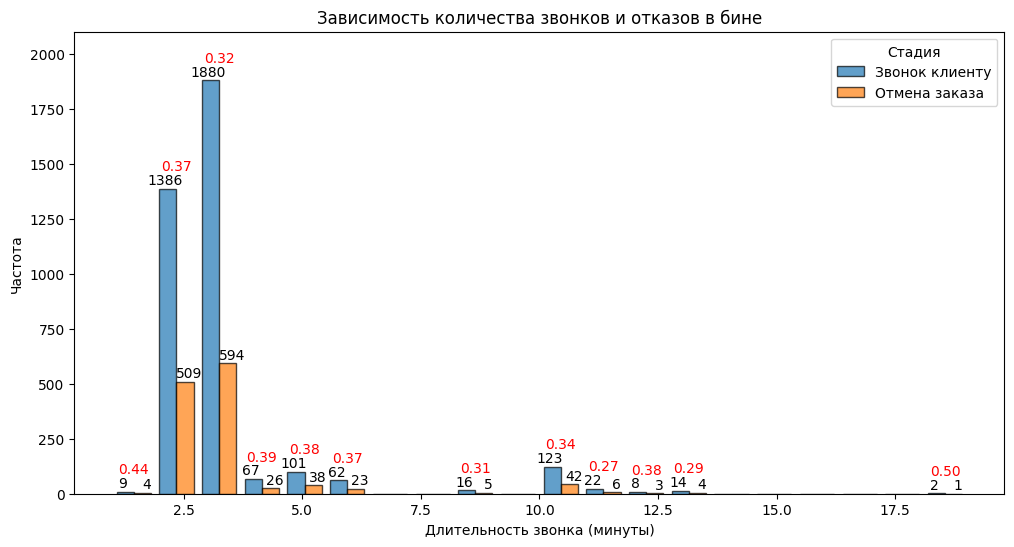

In [106]:
import matplotlib.pyplot as plt
import numpy as np

filtered_data_call = data_with_call[data_with_call['stage'] == 'Звонок клиенту']
filtered_data_cancel = data_with_call[data_with_call['stage'] == 'Отмена заказа']

bins = 20

call_durations_minutes = filtered_data_call['call_duration'].dt.total_seconds() / 60
cancel_durations_minutes = filtered_data_cancel['call_duration'].dt.total_seconds() / 60

call_counts, call_bin_edges = np.histogram(call_durations_minutes, bins=bins)
cancel_counts, cancel_bin_edges = np.histogram(cancel_durations_minutes, bins=bins)

bin_centers = (call_bin_edges[:-1] + call_bin_edges[1:]) / 2
width = (call_bin_edges[1] - call_bin_edges[0]) * 0.4

plt.figure(figsize=(12, 6))
plt.bar(bin_centers - width/2, call_counts, width=width, label='Звонок клиенту', alpha=0.7, edgecolor='black')
plt.bar(bin_centers + width/2, cancel_counts, width=width, label='Отмена заказа', alpha=0.7, edgecolor='black')

for center, count in zip(bin_centers, call_counts):
    if count > 0:
        plt.text(center - width/2 - 0.05, count + 5, str(count), ha='center', va='bottom')

for center, count in zip(bin_centers, cancel_counts):
    if count > 0:
        plt.text(center + width/2 + 0.09, count + 5, str(count), ha='center', va='bottom')

for center, call_count, cancel_count in zip(bin_centers, call_counts, cancel_counts):
    if call_count > 0 and cancel_count > 0:
        ratio = min(call_count, cancel_count) / max(call_count, cancel_count)
        plt.annotate(f'{ratio:.2f}', (center, max(call_count, cancel_count) + 100), ha='center', va='center', color='red')

plt.title('Зависимость количества звонков и отказов в бине')
plt.xlabel('Длительность звонка (минуты)')
plt.ylabel('Частота')
plt.legend(loc='upper right', title='Стадия')
plt.ylim(0, 2100)

plt.show()


In [107]:
first_event = data.loc[data['start_time'].idxmin()]
print(first_event)


case                      78591858581
stage                  Заказ оформлен
start_time        2022-10-01 08:01:00
end_time          2022-10-01 08:01:00
stage_priority                      0
duration              0 days 00:00:00
hour                                8
weekday                      Saturday
Name: 151223, dtype: object


In [108]:
first_event = data.loc[data['end_time'].idxmax()]
print(first_event)


case                      49256919864
stage                 Проверка заказа
start_time        2022-12-31 01:28:00
end_time          2022-12-31 01:30:00
stage_priority                      8
duration              0 days 00:02:00
hour                                1
weekday                      Saturday
Name: 156271, dtype: object


In [109]:
import pandas as pd
first_call_event = data[data['stage'] == 'Звонок клиенту'].sort_values('start_time').iloc[0]
print(first_call_event)

case                      78591858581
stage                  Звонок клиенту
start_time        2022-10-01 08:26:00
end_time          2022-10-01 08:28:00
stage_priority                      3
duration              0 days 00:02:00
hour                                8
weekday                      Saturday
Name: 151226, dtype: object


## Неэффективность из стадии в начало

In [110]:
decreasing_transitions = []
for i in range(10,0,-1):
    for j in range(i-2,0,-1):
        decreasing_transitions.append((i,j))

more_one = []
not_effectients = [[],[],[],[],[],[],[],[],[],[]]
for case_id, group in data.groupby('case'):
    priorities = group['stage_priority'].tolist()
    
    transitions = [(priorities[i], priorities[i + 1]) for i in range(len(priorities) - 1)]
    for transition in transitions:
        if(transition[0]-transition[1]>1):
            print(transition)
    decreasing_transitions_detected = [transition for transition in transitions if transition in decreasing_transitions]
    
    if decreasing_transitions_detected:
        print(f"\nCase {case_id} ")
        print(f"Stage priorities: {priorities}")
        print(f"Detected transitions: {decreasing_transitions_detected}")
        for i in range(1, 11):
            if( (i,i-1) in decreasing_transitions_detected ):
                not_effectients[i-1].append([case_id,priorities,decreasing_transitions_detected])
            
        
        if(len(decreasing_transitions_detected)>1):
            more_one.append([case_id,priorities,decreasing_transitions_detected])


In [111]:
decreasing_transitions = []
for i in range(10,0,-1):
        decreasing_transitions.append((i,0))
print(decreasing_transitions)
more_one = []
not_effectients = [[],[],[],[],[],[],[],[],[],[]]
for case_id, group in data.groupby('case'):
    priorities = group['stage_priority'].tolist()
    
    transitions = [(priorities[i], priorities[i + 1]) for i in range(len(priorities) - 1)]
    decreasing_transitions_detected = [transition for transition in transitions if transition in decreasing_transitions]
    
    if decreasing_transitions_detected:
        print(f"\nCase {case_id} ")
        print(f"Stage priorities: {priorities}")
        print(f"Detected transitions: {decreasing_transitions_detected}")
        for i in range(1, 11):
            if( (i,i-1) in decreasing_transitions_detected ):
                not_effectients[i-1].append([case_id,priorities,decreasing_transitions_detected])
            
        
        if(len(decreasing_transitions_detected)>1):
            more_one.append([case_id,priorities,decreasing_transitions_detected])


[(10, 0), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0)]


## Неэффективность BPMN

In [112]:
first_stage_per_case = data.groupby('case')['stage_priority'].min()

non_zero_starting_stages = first_stage_per_case[first_stage_per_case != 0]

print("Этапы, начинающиеся не с 0 приоритета:")
print(non_zero_starting_stages)


Этапы, начинающиеся не с 0 приоритета:
Series([], Name: stage_priority, dtype: int64)


In [113]:

last_stage_per_case = data.groupby('case')['stage_priority'].max()

non_nine_ten_ending_stages = last_stage_per_case[~last_stage_per_case.isin([9, 10])]

print("Этапы, не заканчивающиеся 9 или 10 приоритетами:")
print(non_nine_ten_ending_stages)


Этапы, не заканчивающиеся 9 или 10 приоритетами:
Series([], Name: stage_priority, dtype: int64)


In [114]:

grouped_data = data.groupby('case')
expected_priorities = [
    [0, 1, 2, 3, 4, 5, 6, 7, 8],
    [0, 1, 2, 4, 5, 6, 7, 8],
    [0,10],
    [0,1,10],
    [0,1,2,10],
    [0,1,2,10],
    [0,1,2,4,10],
    [0,1,2,4,5,10],
    [0,1,2,4,5,6,10],
    [0,1,2,4,5,6,7,10],
    [0,1,2,4,5,6,7,8,10],
    [0,1,2,4,5,6,7,8,10],
    [0,1,2,4,5,6,7,8,9,10],
    [0,1,2,4,5,6,7,8,9],
    [0,10],
    [0,1,2,3,10],
    [0,1,2,3,4,10],
    [0,1,2,3,4,5,10],
    [0,1,2,3,4,5,6,10],
    [0,1,2,3,4,5,6,7,10],
    [0,1,2,3,4,5,6,7,8,10],
    [0,1,2,3,4,5,6,7,8,9,10],
    [0,1,2,3,4,5,6,7,8,9],
    ]


cases_with_gaps = []
for case_id, group in grouped_data:
    priorities = list(set(group['stage_priority'].tolist()))
    
    if priorities not in expected_priorities:
        print(priorities)
        cases_with_gaps.append(case_id)

print("Заказы с пропущенными этапами:")
print(cases_with_gaps)


Заказы с пропущенными этапами:
[]


In [115]:
data[data['case'] == 10030750909]

,case,stage,start_time,end_time,stage_priority,duration,hour,weekday
149962,10030750909,Заказ оформлен,2022-10-18 20:16:00,2022-10-18 20:16:00,0,0 days 00:00:00,20,Tuesday
149963,10030750909,Поступление заказа сборщику,2022-10-18 20:16:00,2022-10-18 20:18:00,1,0 days 00:02:00,20,Tuesday
149964,10030750909,Сборка заказа,2022-10-18 20:18:00,2022-10-18 20:42:00,2,0 days 00:24:00,20,Tuesday
149965,10030750909,Звонок клиенту,2022-10-18 20:42:00,2022-10-18 20:42:00,3,0 days 00:00:00,20,Tuesday
149966,10030750909,Звонок клиенту,2022-10-18 20:42:00,2022-10-18 20:44:00,3,0 days 00:02:00,20,Tuesday
149967,10030750909,Сборка заказа,2022-10-18 20:44:00,2022-10-18 21:08:00,2,0 days 00:24:00,20,Tuesday
149968,10030750909,Звонок клиенту,2022-10-18 21:08:00,2022-10-18 21:10:00,3,0 days 00:02:00,21,Tuesday
149969,10030750909,Отмена заказа,2022-10-18 21:10:00,2022-10-18 21:10:00,10,0 days 00:00:00,21,Tuesday


## Длительность процесса 

In [116]:


grouped_data = data.groupby('case')

case_durations = {}

data['start_time'] = pd.to_datetime(data['start_time'],format='%d.%m.%Y %H:%M')
data['end_time'] = pd.to_datetime(data['end_time'],format='%d.%m.%Y %H:%M')

for case_id, group in grouped_data:
    start_time = group['start_time'].min()
    end_time = group['end_time'].max()

    duration1 = end_time - start_time
    duration2 = group['duration'].sum()
    
    if(duration1>duration2):
        case_durations[case_id] = duration2
    else:
        case_durations[case_id] = duration1

data['full_duration'] = data['case'].map(case_durations)
data

,case,stage,start_time,end_time,stage_priority,duration,hour,weekday,full_duration
0,77654086061,Заказ оформлен,2022-10-05 17:57:00,2022-10-05 17:57:00,0,0 days 00:00:00,17,Wednesday,0 days 00:28:00
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:00,2022-10-05 17:58:00,1,0 days 00:01:00,17,Wednesday,0 days 00:28:00
2,77654086061,Сборка заказа,2022-10-05 17:58:00,2022-10-05 18:22:00,2,0 days 00:24:00,17,Wednesday,0 days 00:28:00
3,77654086061,Упаковка товара,2022-10-05 18:22:00,2022-10-05 18:24:00,4,0 days 00:02:00,18,Wednesday,0 days 00:28:00
4,77654086061,Оплата,2022-10-05 18:24:00,2022-10-05 18:24:00,5,0 days 00:00:00,18,Wednesday,0 days 00:28:00
...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:00,2022-12-02 09:03:00,6,0 days 00:03:00,9,Friday,0 days 01:06:00
179026,86369405113,Доставка заказа,2022-12-02 09:03:00,2022-12-02 09:36:00,7,0 days 00:33:00,9,Friday,0 days 01:06:00
179027,86369405113,Проверка заказа,2022-12-02 09:36:00,2022-12-02 09:38:00,8,0 days 00:02:00,9,Friday,0 days 01:06:00
179028,86369405113,Отмена заказа,2022-12-02 09:38:00,2022-12-02 09:38:00,10,0 days 00:00:00,9,Friday,0 days 01:06:00


In [117]:
data[data['stage']=='Проверка заказа'].sort_values(by='duration')

,case,stage,start_time,end_time,stage_priority,duration,hour,weekday,full_duration
63262,77000642766,Проверка заказа,2022-11-11 18:14:00,2022-11-11 18:15:00,8,0 days 00:01:00,18,Friday,0 days 01:07:00
115894,25773269233,Проверка заказа,2022-10-03 00:26:00,2022-10-03 00:27:00,8,0 days 00:01:00,0,Monday,0 days 01:06:00
137634,61213399534,Проверка заказа,2022-12-07 23:42:00,2022-12-07 23:43:00,8,0 days 00:01:00,23,Wednesday,0 days 01:07:00
90001,45125813014,Проверка заказа,2022-12-24 19:29:00,2022-12-24 19:30:00,8,0 days 00:01:00,19,Saturday,0 days 01:04:00
59005,32812490198,Проверка заказа,2022-10-11 18:54:00,2022-10-11 18:55:00,8,0 days 00:01:00,18,Tuesday,0 days 01:07:00
...,...,...,...,...,...,...,...,...,...
56773,13887116859,Проверка заказа,2022-11-25 09:26:00,2022-11-25 09:29:00,8,0 days 00:03:00,9,Friday,0 days 01:07:00
46576,88224879623,Проверка заказа,2022-12-27 23:02:00,2022-12-27 23:05:00,8,0 days 00:03:00,23,Tuesday,0 days 01:08:00
164609,35047786544,Проверка заказа,2022-11-03 22:26:00,2022-11-03 22:29:00,8,0 days 00:03:00,22,Thursday,0 days 01:34:00
44974,47441412026,Проверка заказа,2022-12-24 11:23:00,2022-12-24 11:26:00,8,0 days 00:03:00,11,Saturday,0 days 01:08:00


In [118]:
data.sort_values(by='full_duration').tail(50)

,case,stage,start_time,end_time,stage_priority,duration,hour,weekday,full_duration
176252,20055975786,Сборка заказа,2022-12-21 11:17:00,2022-12-21 11:41:00,2,0 days 00:24:00,11,Wednesday,0 days 02:39:00
176251,20055975786,Поступление заказа сборщику,2022-12-21 10:43:00,2022-12-21 11:17:00,1,0 days 00:34:00,10,Wednesday,0 days 02:39:00
176250,20055975786,Заказ оформлен,2022-12-21 10:43:00,2022-12-21 10:43:00,0,0 days 00:00:00,10,Wednesday,0 days 02:39:00
176255,20055975786,Упаковка товара,2022-12-21 12:06:00,2022-12-21 12:08:00,4,0 days 00:02:00,12,Wednesday,0 days 02:39:00
170000,69136924716,Проверка заказа,2022-10-26 23:51:00,2022-10-26 23:53:00,8,0 days 00:02:00,23,Wednesday,0 days 02:39:00
162268,16435919915,Заказ оформлен,2022-12-23 21:58:00,2022-12-23 21:58:00,0,0 days 00:00:00,21,Friday,0 days 02:39:00
169991,69136924716,Заказ оформлен,2022-10-26 21:14:00,2022-10-26 21:14:00,0,0 days 00:00:00,21,Wednesday,0 days 02:39:00
169992,69136924716,Поступление заказа сборщику,2022-10-26 21:14:00,2022-10-26 21:15:00,1,0 days 00:01:00,21,Wednesday,0 days 02:39:00
169993,69136924716,Сборка заказа,2022-10-26 21:15:00,2022-10-26 21:39:00,2,0 days 00:24:00,21,Wednesday,0 days 02:39:00
169994,69136924716,Поступление заказа сборщику,2022-10-26 21:39:00,2022-10-26 22:12:00,1,0 days 00:33:00,21,Wednesday,0 days 02:39:00


In [119]:
data[data['stage']=='Заказ доставлен'].sort_values(by='full_duration')

,case,stage,start_time,end_time,stage_priority,duration,hour,weekday,full_duration
92090,74577287137,Заказ доставлен,2022-12-14 22:40:00,2022-12-14 22:40:00,9,0 days,22,Wednesday,0 days 01:02:00
90839,76197332767,Заказ доставлен,2022-11-03 20:45:00,2022-11-03 20:45:00,9,0 days,20,Thursday,0 days 01:02:00
69590,79376051470,Заказ доставлен,2022-11-01 11:15:00,2022-11-01 11:15:00,9,0 days,11,Tuesday,0 days 01:02:00
114590,52141437108,Заказ доставлен,2022-11-17 16:37:00,2022-11-17 16:37:00,9,0 days,16,Thursday,0 days 01:02:00
45839,14292427236,Заказ доставлен,2022-11-16 10:54:00,2022-11-16 10:54:00,9,0 days,10,Wednesday,0 days 01:02:00
...,...,...,...,...,...,...,...,...,...
176260,20055975786,Заказ доставлен,2022-12-21 13:22:00,2022-12-21 13:22:00,9,0 days,13,Wednesday,0 days 02:39:00
170001,69136924716,Заказ доставлен,2022-10-26 23:53:00,2022-10-26 23:53:00,9,0 days,23,Wednesday,0 days 02:39:00
162278,16435919915,Заказ доставлен,2022-12-24 00:37:00,2022-12-24 00:37:00,9,0 days,0,Saturday,0 days 02:39:00
153063,79080562311,Заказ доставлен,2022-12-16 01:24:00,2022-12-16 01:24:00,9,0 days,1,Friday,0 days 02:40:00


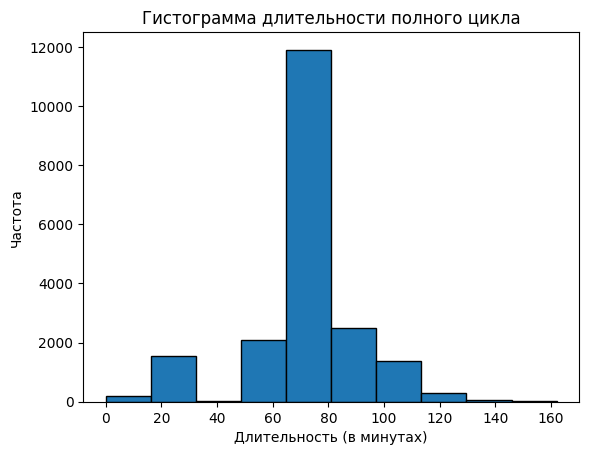

In [120]:
import matplotlib.pyplot as plt
import numpy as np

case_data = data.drop_duplicates(subset='case')

bins = 10
case_counts, case_bin_edges = np.histogram(case_data['full_duration'].dt.total_seconds() / 60, bins=bins)

bin_centers = (case_bin_edges[:-1] + case_bin_edges[1:]) / 2
width = (case_bin_edges[1] - case_bin_edges[0])

plt.bar(bin_centers, case_counts, width=width, edgecolor='black')
plt.xlabel('Длительность (в минутах)')
plt.ylabel('Частота')
plt.title('Гистограмма длительности полного цикла')
plt.show()


In [121]:
from scipy.stats import chisquare

observed_frequencies, bin_edges = np.histogram(case_data['full_duration'].dt.total_seconds() / 60, bins=bins)

chi2_stat, p_value = chisquare(observed_frequencies)

bin_ranges = list(zip(np.round(bin_edges[:-1],1), np.round(bin_edges[1:],1)))

df = pd.DataFrame({'bin_range': bin_ranges, 'observed_frequencies': observed_frequencies})
df


,bin_range,observed_frequencies
0,"(0.0, 16.2)",207
1,"(16.2, 32.4)",1538
2,"(32.4, 48.6)",29
3,"(48.6, 64.8)",2094
4,"(64.8, 81.0)",11901
5,"(81.0, 97.2)",2489
6,"(97.2, 113.4)",1371
7,"(113.4, 129.6)",300
8,"(129.6, 145.8)",46
9,"(145.8, 162.0)",13


In [122]:

print(f"Статистика Хи-квадрат: {chi2_stat}")
print(f"P-значение: {p_value}")
print("""\nПо полученным данным статистика Хи-квадрат является очень значительной, а p-значение стремится к нулю. 
Эти результаты говорят о том, что распределение данных в столбце 'full_duration' значительно отличается от нормального распределения.
На основании этого теста можно отклонить гипотезу о нормальном распределении данных в столбце 'full_duration'.""")

Статистика Хи-квадрат: 58356.415649389644
P-значение: 0.0

По полученным данным статистика Хи-квадрат является очень значительной, а p-значение стремится к нулю. 
Эти результаты говорят о том, что распределение данных в столбце 'full_duration' значительно отличается от нормального распределения.
На основании этого теста можно отклонить гипотезу о нормальном распределении данных в столбце 'full_duration'.


Text(20.847222222222214, 0.5, 'Частота (логарифмический масштаб)')

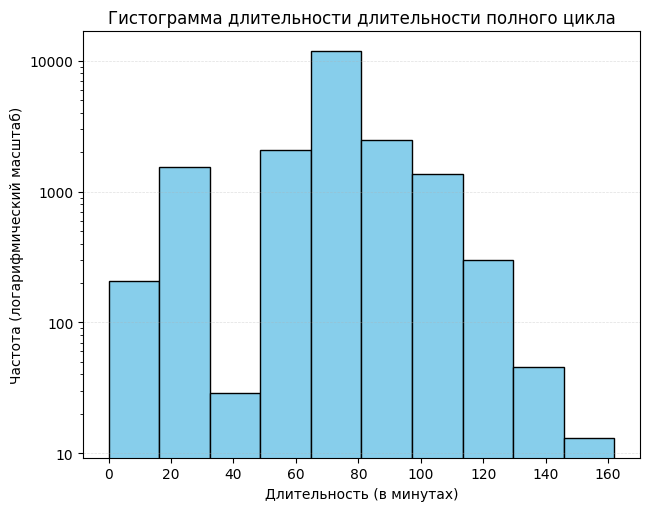

In [123]:
import matplotlib.pyplot as plt
import numpy as np


plt.yscale('log')

plt.yticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000'])

plt.bar(bin_centers, case_counts, width=width, color='skyblue', edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.4, linewidth=0.5)
plt.tight_layout()
plt.title('Гистограмма длительности длительности полного цикла')
plt.xlabel('Длительность (в минутах)')
plt.ylabel('Частота (логарифмический масштаб)')


In [124]:
from scipy.stats import chisquare

observed_frequencies, bin_edges = np.histogram(case_data['full_duration'].dt.total_seconds() / 60, bins=bins)
observed_frequencies = np.log(observed_frequencies)

chi2_stat, p_value = chisquare(observed_frequencies)

bin_ranges = list(zip(np.round(bin_edges[:-1],1), np.round(bin_edges[1:],1)))

df = pd.DataFrame({'bin_range': bin_ranges, 'observed_frequencies': observed_frequencies})
df


,bin_range,observed_frequencies
0,"(0.0, 16.2)",5.332719
1,"(16.2, 32.4)",7.338238
2,"(32.4, 48.6)",3.367296
3,"(48.6, 64.8)",7.646831
4,"(64.8, 81.0)",9.384378
5,"(81.0, 97.2)",7.819636
6,"(97.2, 113.4)",7.223296
7,"(113.4, 129.6)",5.703782
8,"(129.6, 145.8)",3.828641
9,"(145.8, 162.0)",2.564949


In [125]:

print(f"Статистика Хи-квадрат: {chi2_stat}")
print(f"P-значение: {p_value}")
print(f"""\nПолученная статистика Хи-квадрат составляет примерно {round(chi2_stat,2)}, а p-значение примерно {round(p_value,2)}.
По общепринятому порогу значимости 0.05, полученное p-значение существенно превышает этот порог,
что указывает на то, что у нас нет достаточных доказательств для отвержения нулевой гипотезы о нормальности распределения данных.
Эти результаты говорят о том, что данные в логарифмической шкале распределены однозначно нормально.""")

Статистика Хи-квадрат: 7.430453458345147
P-значение: 0.5923964374802537

Полученная статистика Хи-квадрат составляет примерно 7.43, а p-значение примерно 0.59.
По общепринятому порогу значимости 0.05, полученное p-значение существенно превышает этот порог,
что указывает на то, что у нас нет достаточных доказательств для отвержения нулевой гипотезы о нормальности распределения данных.
Эти результаты говорят о том, что данные в логарифмической шкале распределены однозначно нормально.


In [126]:
import pandas as pd

data_filtred_quantiles = pd.DataFrame(case_data['full_duration'].dt.total_seconds() / 60, columns=['full_duration'])

Q1 = data_filtred_quantiles['full_duration'].quantile(0.25)
Q3 = data_filtred_quantiles['full_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data_full_duration = data_filtred_quantiles[(data_filtred_quantiles['full_duration'] > lower_bound) & (data_filtred_quantiles['full_duration'] < upper_bound)]

filtered_data_full_duration

,full_duration
24,65.0
34,65.0
44,65.0
54,67.0
64,65.0
...,...
178952,66.0
178988,67.0
179000,65.0
179010,68.0


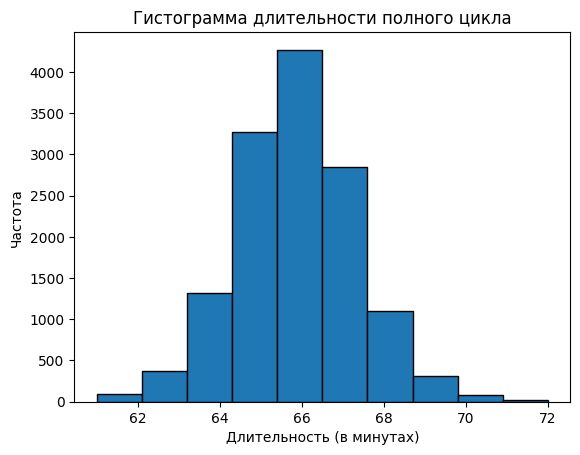

In [127]:
import matplotlib.pyplot as plt
import numpy as np

bins = 10
case_counts, case_bin_edges = np.histogram(filtered_data_full_duration['full_duration'], bins=bins)

bin_centers = (case_bin_edges[:-1] + case_bin_edges[1:]) / 2
width = (case_bin_edges[1] - case_bin_edges[0])

plt.bar(bin_centers, case_counts, width=width, edgecolor='black')
plt.xlabel('Длительность (в минутах)')
plt.ylabel('Частота')
plt.title('Гистограмма длительности полного цикла')
plt.show()


In [128]:
from scipy.stats import chisquare
bins = 10
observed_frequencies, bin_edges = np.histogram(filtered_data_full_duration['full_duration'], bins=bins)

chi2_stat, p_value = chisquare(observed_frequencies)

bin_ranges = list(zip(np.round(bin_edges[:-1],1), np.round(bin_edges[1:],1)))

df = pd.DataFrame({'bin_range': bin_ranges, 'observed_frequencies': observed_frequencies})
df


,bin_range,observed_frequencies
0,"(61.0, 62.1)",95
1,"(62.1, 63.2)",375
2,"(63.2, 64.3)",1317
3,"(64.3, 65.4)",3269
4,"(65.4, 66.5)",4269
5,"(66.5, 67.6)",2850
6,"(67.6, 68.7)",1105
7,"(68.7, 69.8)",310
8,"(69.8, 70.9)",81
9,"(70.9, 72.0)",15


In [129]:

print(f"Статистика Хи-квадрат: {chi2_stat}")
print(f"P-значение: {p_value}")
print(f"""\nПопытка удалить выбросы квантильным отсечением к ожидаемому результату не приводит.""")

Статистика Хи-квадрат: 15717.238345754788
P-значение: 0.0

Попытка удалить выбросы квантильным отсечением к ожидаемому результату не приводит.


## Проверка SLA

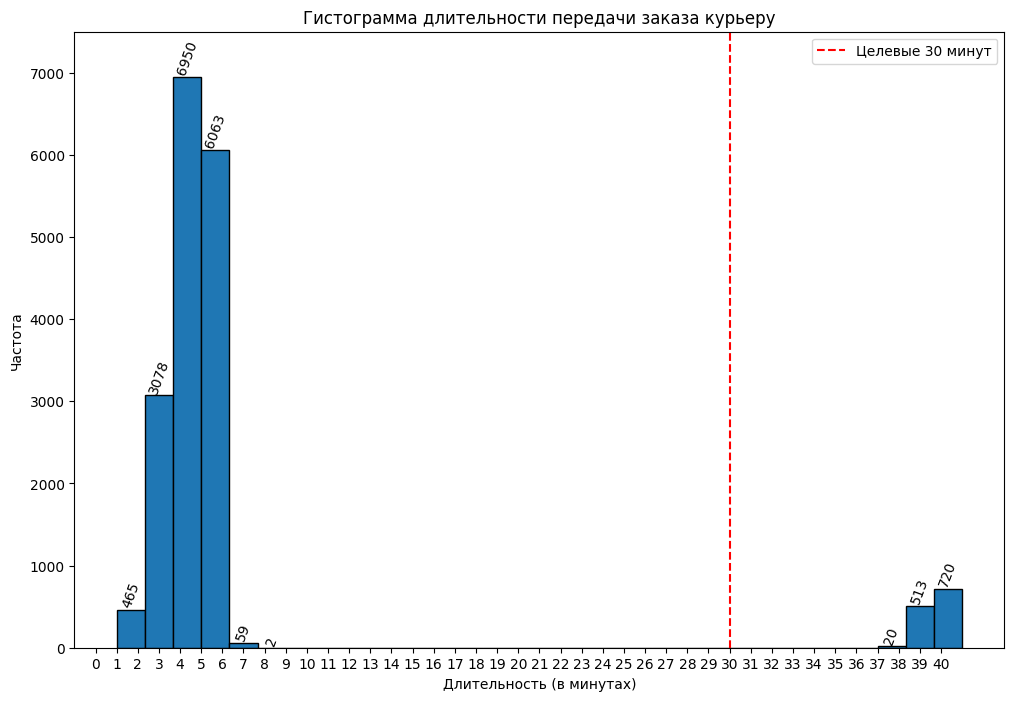

Сумма значений до 30 минут: 16617
Сумма значений после 30 минут: 1253


In [135]:
import matplotlib.pyplot as plt
import numpy as np

bins = 30
case_counts, case_bin_edges = np.histogram(data[data['stage'] == 'Передача товара курьеру']['duration'].dt.total_seconds() / 60, bins=bins)

bin_centers = (case_bin_edges[:-1] + case_bin_edges[1:]) / 2
width = (case_bin_edges[1] - case_bin_edges[0])
plt.figure(figsize=(12, 8))
plt.bar(bin_centers, case_counts, width=width, edgecolor='black')
plt.xlabel('Длительность (в минутах)')
plt.ylabel('Частота')
plt.title('Гистограмма длительности передачи заказа курьеру')

target_duration = 30
plt.axvline(x=target_duration, color='red', linestyle='--', label=f'Целевые {target_duration} минут')

plt.xticks(range(0, int(max(bin_centers)) + 1, 1)) 

for count, x in zip(case_counts, bin_centers):
    if(count>0):
        plt.text(x, count, str(int(count)), ha='center', va='bottom',rotation=70)
plt.ylim(0,7500)
plt.legend()
plt.show()
nearest_index_30_minutes = np.abs(bin_centers - 30).argmin()

sum_before_30 = np.sum(case_counts[:nearest_index_30_minutes])

sum_after_30 = np.sum(case_counts[nearest_index_30_minutes:])

print(f"Сумма значений до 30 минут: {sum_before_30}")
print(f"Сумма значений после 30 минут: {sum_after_30}")


In [136]:

nearest_index_30_minutes = np.abs(bin_centers - 30).argmin()

sum_before_30 = np.sum(case_counts[:nearest_index_30_minutes])

sum_after_30 = np.sum(case_counts[nearest_index_30_minutes:])

print(f"Сумма значений до 30 минут: {sum_before_30}")
print(f"Сумма значений после 30 минут: {sum_after_30}")


Сумма значений до 30 минут: 16617
Сумма значений после 30 минут: 1253


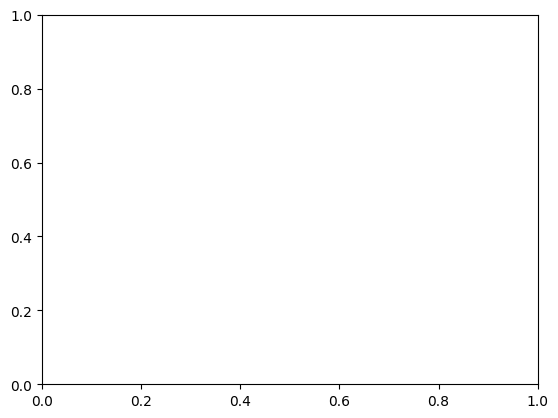

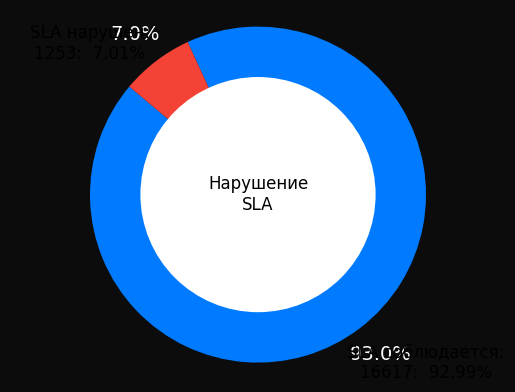

In [137]:
import matplotlib.pyplot as plt


sla_values = {'Соблюдается': sum_before_30, 'Нарушен': sum_after_30}

colors = ['#007bff', '#F44336']  

fig, ax = plt.subplots()
fig, ax = plt.subplots(facecolor='#0C0C0C')
ax.pie(sla_values.values(), labels=None, colors=colors, startangle=140, autopct='%1.1f%%', pctdistance=1.2, textprops={'color':"w",'fontsize': 14})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Нарушение\nSLA', ha='center', va='center', color='black', fontsize='large')
plt.text(-1, 0.9, f'SLA нарушен:\n{sum_after_30}:  {round(sum_after_30/(sum_before_30+sum_after_30)*100,2)}%', ha='center', va='center', color='black', fontsize='large')
plt.text(1, -1, f'SLA соблюдается:\n{sum_before_30}:  {round(sum_before_30/(sum_before_30+sum_after_30)*100,2)}%', ha='center', va='center', color='black', fontsize='large')

plt.axis('equal')

plt.show()


# Этап второй

## Просто дата

In [141]:
data = pd.read_csv('Доставка_продукт.csv', sep=';',encoding='cp1251')
data

,case,stage,start_time,end_time,client,staff,feedback,status
0,77654086061,Заказ оформлен,05.10.2022 17:57:33,05.10.2022 17:57:40,Ефим Елисеевич Кошелев,NaN,,
1,77654086061,Поступление заказа сборщику,05.10.2022 17:57:40,05.10.2022 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,
2,77654086061,Сборка заказа,05.10.2022 17:58:47,05.10.2022 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,
3,77654086061,Упаковка товара,05.10.2022 18:22:29,05.10.2022 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,
4,77654086061,Оплата,05.10.2022 18:24:31,05.10.2022 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error
...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,02.12.2022 09:00:01,02.12.2022 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,
179026,86369405113,Доставка заказа,02.12.2022 09:03:54,02.12.2022 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,
179027,86369405113,Проверка заказа,02.12.2022 09:36:53,02.12.2022 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,
179028,86369405113,Отмена заказа,02.12.2022 09:38:32,02.12.2022 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,


In [142]:
data['start_time'] = pd.to_datetime(data['start_time'],format='%d.%m.%Y %H:%M:%S')
data['end_time'] = pd.to_datetime(data['end_time'],format='%d.%m.%Y %H:%M:%S')
data['duration'] = data['end_time'] - data['start_time']
data

,case,stage,start_time,end_time,client,staff,feedback,status,duration
0,77654086061,Заказ оформлен,2022-10-05 17:57:33,2022-10-05 17:57:40,Ефим Елисеевич Кошелев,NaN,,,0 days 00:00:07
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:40,2022-10-05 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:01:07
2,77654086061,Сборка заказа,2022-10-05 17:58:47,2022-10-05 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:23:42
3,77654086061,Упаковка товара,2022-10-05 18:22:29,2022-10-05 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:02:02
4,77654086061,Оплата,2022-10-05 18:24:31,2022-10-05 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error,0 days 00:00:23
...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:01,2022-12-02 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:03:53
179026,86369405113,Доставка заказа,2022-12-02 09:03:54,2022-12-02 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:32:59
179027,86369405113,Проверка заказа,2022-12-02 09:36:53,2022-12-02 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:39
179028,86369405113,Отмена заказа,2022-12-02 09:38:32,2022-12-02 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:00:19


In [143]:
df_products = pd.read_excel('Доставка_продукта.xlsx', 'Список')
df_products

,case,клиенты,курьеры,сборщики
0,78591858581,Бакштаев Леонид Георгиевич,Аав Тыну,Варлаам Матвеевич Орехов
1,56239044400,Балабанов Виктор Васильевич,Абаджян Владимир Амвросьевич,Любосмысл Федотович Красильников
2,33537367518,Балаев Расим Ахмед оглы,Абайдулов Гали Мягазович,Осипов Софон Ефстафьевич
3,89615235440,Балакин Олег Александрович,Абалян Эдуард Гайкович,Игнатова Марфа Архиповна
4,35772926446,Баландис Саулюс,Абашев Владимир Владимирович,Самсон Харлампович Зимин
...,...,...,...,...
19983,62056892467,Гунн Кирилл Андреевич,Бабенко Николай Андреевич,Пелагея Юльевна Беляева
19984,15376925122,Гуревич Моисей Вульфович,Баблуани Теймураз Гелаевич,Гурьева Ульяна Юрьевна
19985,11741416944,Гурзо Сергей Сергеевич,Бабятинский Валерий Константинович,Наина Антоновна Воронцова
19986,37190453425,Гуров Евгений Алексеевич,Багашвили Спартак Леванович,Ильина Майя Станиславовна


In [144]:
merged_df = pd.merge(data,df_products,'inner',on='case')
merged_df

,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики
0,77654086061,Заказ оформлен,2022-10-05 17:57:33,2022-10-05 17:57:40,Ефим Елисеевич Кошелев,NaN,,,0 days 00:00:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:40,2022-10-05 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:01:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
2,77654086061,Сборка заказа,2022-10-05 17:58:47,2022-10-05 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:23:42,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
3,77654086061,Упаковка товара,2022-10-05 18:22:29,2022-10-05 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:02:02,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
4,77654086061,Оплата,2022-10-05 18:24:31,2022-10-05 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error,0 days 00:00:23,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
...,...,...,...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:01,2022-12-02 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:03:53,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179026,86369405113,Доставка заказа,2022-12-02 09:03:54,2022-12-02 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:32:59,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179027,86369405113,Проверка заказа,2022-12-02 09:36:53,2022-12-02 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:39,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179028,86369405113,Отмена заказа,2022-12-02 09:38:32,2022-12-02 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:00:19,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова


In [145]:
def sort_group(group):
    return group.sort_values('start_time')

sorted_df = merged_df.groupby('case', group_keys=False).apply(sort_group)

sorted_df


,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики
0,77654086061,Заказ оформлен,2022-10-05 17:57:33,2022-10-05 17:57:40,Ефим Елисеевич Кошелев,NaN,,,0 days 00:00:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:40,2022-10-05 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:01:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
2,77654086061,Сборка заказа,2022-10-05 17:58:47,2022-10-05 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:23:42,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
3,77654086061,Упаковка товара,2022-10-05 18:22:29,2022-10-05 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:02:02,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
4,77654086061,Оплата,2022-10-05 18:24:31,2022-10-05 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error,0 days 00:00:23,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
...,...,...,...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:01,2022-12-02 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:03:53,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179026,86369405113,Доставка заказа,2022-12-02 09:03:54,2022-12-02 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:32:59,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179027,86369405113,Проверка заказа,2022-12-02 09:36:53,2022-12-02 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:39,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179028,86369405113,Отмена заказа,2022-12-02 09:38:32,2022-12-02 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:00:19,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова


In [146]:
import pandas as pd

sorted_df.to_csv('sorted_df.csv', index=False)

## Начало

In [147]:
sorted_df = pd.read_csv('sorted_df.csv', sep=',')
sorted_df

,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики
0,77654086061,Заказ оформлен,2022-10-05 17:57:33,2022-10-05 17:57:40,Ефим Елисеевич Кошелев,NaN,,,0 days 00:00:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:40,2022-10-05 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:01:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
2,77654086061,Сборка заказа,2022-10-05 17:58:47,2022-10-05 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:23:42,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
3,77654086061,Упаковка товара,2022-10-05 18:22:29,2022-10-05 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:02:02,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
4,77654086061,Оплата,2022-10-05 18:24:31,2022-10-05 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error,0 days 00:00:23,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
...,...,...,...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:01,2022-12-02 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:03:53,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179026,86369405113,Доставка заказа,2022-12-02 09:03:54,2022-12-02 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:32:59,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179027,86369405113,Проверка заказа,2022-12-02 09:36:53,2022-12-02 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:39,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179028,86369405113,Отмена заказа,2022-12-02 09:38:32,2022-12-02 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:00:19,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова


In [148]:
sorted_df['start_time'] = pd.to_datetime(sorted_df['start_time'],format='%Y-%m-%d %H:%M:%S')
sorted_df['end_time'] = pd.to_datetime(sorted_df['end_time'],format='%Y-%m-%d %H:%M:%S')
sorted_df['duration'] = sorted_df['end_time'] - sorted_df['start_time']
sorted_df

,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики
0,77654086061,Заказ оформлен,2022-10-05 17:57:33,2022-10-05 17:57:40,Ефим Елисеевич Кошелев,NaN,,,0 days 00:00:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:40,2022-10-05 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:01:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
2,77654086061,Сборка заказа,2022-10-05 17:58:47,2022-10-05 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:23:42,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
3,77654086061,Упаковка товара,2022-10-05 18:22:29,2022-10-05 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:02:02,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
4,77654086061,Оплата,2022-10-05 18:24:31,2022-10-05 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error,0 days 00:00:23,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов
...,...,...,...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:01,2022-12-02 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:03:53,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179026,86369405113,Доставка заказа,2022-12-02 09:03:54,2022-12-02 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:32:59,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179027,86369405113,Проверка заказа,2022-12-02 09:36:53,2022-12-02 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:39,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова
179028,86369405113,Отмена заказа,2022-12-02 09:38:32,2022-12-02 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:00:19,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова


In [149]:
sorted_df['next_stage'] = sorted_df.groupby('case')['stage'].shift(-1)
sorted_df

,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики,next_stage
0,77654086061,Заказ оформлен,2022-10-05 17:57:33,2022-10-05 17:57:40,Ефим Елисеевич Кошелев,NaN,,,0 days 00:00:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Поступление заказа сборщику
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:40,2022-10-05 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:01:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Сборка заказа
2,77654086061,Сборка заказа,2022-10-05 17:58:47,2022-10-05 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:23:42,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Упаковка товара
3,77654086061,Упаковка товара,2022-10-05 18:22:29,2022-10-05 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:02:02,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Оплата
4,77654086061,Оплата,2022-10-05 18:24:31,2022-10-05 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error,0 days 00:00:23,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Оплата
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:01,2022-12-02 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:03:53,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Доставка заказа
179026,86369405113,Доставка заказа,2022-12-02 09:03:54,2022-12-02 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:32:59,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Проверка заказа
179027,86369405113,Проверка заказа,2022-12-02 09:36:53,2022-12-02 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:39,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Отмена заказа
179028,86369405113,Отмена заказа,2022-12-02 09:38:32,2022-12-02 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:00:19,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Заказ доставлен


In [150]:
sorted_df['previous_stage'] = sorted_df.groupby('case')['stage'].shift(1)
sorted_df['double_previous_stage'] = sorted_df.groupby('case')['stage'].shift(2)
sorted_df

,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики,next_stage,previous_stage,double_previous_stage
0,77654086061,Заказ оформлен,2022-10-05 17:57:33,2022-10-05 17:57:40,Ефим Елисеевич Кошелев,NaN,,,0 days 00:00:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Поступление заказа сборщику,NaN,NaN
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:40,2022-10-05 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:01:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Сборка заказа,Заказ оформлен,NaN
2,77654086061,Сборка заказа,2022-10-05 17:58:47,2022-10-05 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:23:42,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Упаковка товара,Поступление заказа сборщику,Заказ оформлен
3,77654086061,Упаковка товара,2022-10-05 18:22:29,2022-10-05 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:02:02,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Оплата,Сборка заказа,Поступление заказа сборщику
4,77654086061,Оплата,2022-10-05 18:24:31,2022-10-05 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error,0 days 00:00:23,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Оплата,Упаковка товара,Сборка заказа
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:01,2022-12-02 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:03:53,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Доставка заказа,Оплата,Упаковка товара
179026,86369405113,Доставка заказа,2022-12-02 09:03:54,2022-12-02 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:32:59,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Проверка заказа,Передача товара курьеру,Оплата
179027,86369405113,Проверка заказа,2022-12-02 09:36:53,2022-12-02 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:39,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Отмена заказа,Доставка заказа,Передача товара курьеру
179028,86369405113,Отмена заказа,2022-12-02 09:38:32,2022-12-02 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:00:19,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Заказ доставлен,Проверка заказа,Доставка заказа


In [151]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179030 entries, 0 to 179029
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   case                   179030 non-null  int64          
 1   stage                  179030 non-null  object         
 2   start_time             179030 non-null  datetime64[ns] 
 3   end_time               179030 non-null  datetime64[ns] 
 4   client                 179030 non-null  object         
 5   staff                  154153 non-null  object         
 6   feedback               179030 non-null  object         
 7   status                 179030 non-null  object         
 8   duration               179030 non-null  timedelta64[ns]
 9   клиенты                179030 non-null  object         
 10  курьеры                179030 non-null  object         
 11  сборщики               179030 non-null  object         
 12  next_stage             159042 

In [152]:
sorted_df[sorted_df['feedback'] == '0']['next_stage'].value_counts()

next_stage
Отмена заказа    461
Name: count, dtype: int64

In [153]:
sorted_df[(sorted_df['stage'] == 'Проверка заказа') & (sorted_df['next_stage'] == 'Отмена заказа') ]

,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики,next_stage,previous_stage,double_previous_stage
113,87518891337,Проверка заказа,2022-12-04 21:14:56,2022-12-04 21:16:29,Кузьма Гертрудович Прохоров,Алексеев Николай Валентинович,Первый и последний раз заказала. Приехала поло...,,0 days 00:01:33,Кузьма Гертрудович Прохоров,Алексеев Николай Валентинович,Блохина Евгения Борисовна,Отмена заказа,Доставка заказа,Передача товара курьеру
2161,16871642414,Проверка заказа,2022-12-13 17:04:50,2022-12-13 17:06:25,Тетерин Милан Антонович,Аракелов Борис Аршакович,пользуйтесь другими сервисами и платите по фак...,,0 days 00:01:35,Тетерин Милан Антонович,Аракелов Борис Аршакович,Пелагея Юльевна Беляева,Отмена заказа,Доставка заказа,Передача товара курьеру
2171,25579042411,Проверка заказа,2022-12-09 20:59:50,2022-12-09 21:01:21,Беляев Юрий Викторович,Аркадин Иван Иванович,"Курьер не поднял телефон, когда я пытался связ...",,0 days 00:01:31,Беляев Юрий Викторович,Аркадин Иван Иванович,Фомин Мир Трифонович,Отмена заказа,Доставка заказа,Передача товара курьеру
2181,89489711988,Проверка заказа,2022-10-26 11:21:30,2022-10-26 11:23:16,Головина Светлана Васильевна,Абайдулов Гали Мягазович,"Курьер привез продукты в разорванной упаковке,...",,0 days 00:01:46,Головина Светлана Васильевна,Абайдулов Гали Мягазович,Осипов Софон Ефстафьевич,Отмена заказа,Доставка заказа,Передача товара курьеру
2191,33147195599,Проверка заказа,2022-12-19 09:50:57,2022-12-19 09:52:52,Горбатов Борис Фёдорович,Ахундов Гусейн Мамедович,"Время доставки было большим, чем было указано ...",,0 days 00:01:55,Горбатов Борис Фёдорович,Ахундов Гусейн Мамедович,Павел Феофанович Уваров,Отмена заказа,Доставка заказа,Передача товара курьеру
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178985,71024475446,Проверка заказа,2022-12-09 20:37:19,2022-12-09 20:38:33,Алена Вадимовна Евсеева,Светлана Вадимовна Евсеева,0,,0 days 00:01:14,Балиев Юрий Николаевич,Арсенов Павел Оганезович,Ильина Майя Станиславовна,Отмена заказа,Доставка заказа,Передача товара курьеру
178997,75429342160,Проверка заказа,2022-12-08 13:44:12,2022-12-08 13:45:42,Алена Вадимовна Евсеева,Светлана Вадимовна Евсеева,0,,0 days 00:01:30,Гегечкори Георгий Владимирович,Ай-Артян Арташес Татевосович,Быкова Анжелика Анатольевна,Отмена заказа,Доставка заказа,Передача товара курьеру
179007,78244918485,Проверка заказа,2022-12-07 00:02:10,2022-12-07 00:03:42,Алена Вадимовна Евсеева,Светлана Вадимовна Евсеева,0,,0 days 00:01:32,Соколова Елена Антоновна,Антоник Владимир Владимирович,Быкова Анжелика Анатольевна,Отмена заказа,Доставка заказа,Передача товара курьеру
179017,80583587050,Проверка заказа,2022-12-03 12:41:32,2022-12-03 12:43:04,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:32,Осипова Дарья Захаровна,Антадзе Додо Константинович,Красильникова Нонна Макаровна,Отмена заказа,Доставка заказа,Передача товара курьеру


### Оплата

In [154]:
n = len(sorted_df[(sorted_df['stage'] == 'Оплата') & (sorted_df['previous_stage'] == 'Оплата') ]['case'].drop_duplicates())
n

1293

In [155]:
print("Среднее время на каждый кейс с неэффективностью.")
sorted_df[(sorted_df['stage'] == 'Оплата') & (sorted_df['previous_stage'] == 'Оплата') ]['duration'].sum()/n

Среднее время на каждый кейс с неэффективностью.


Timedelta('0 days 00:00:26.562258313')

In [156]:
print("Суммарное время на каждый кейс с неэффективностью.")
sorted_df[(sorted_df['stage'] == 'Оплата') & (sorted_df['previous_stage'] == 'Оплата') ]['duration'].sum()

Суммарное время на каждый кейс с неэффективностью.


Timedelta('0 days 09:32:25')

In [157]:
payment_not_effectiveness = sorted_df[(sorted_df['stage'] == 'Оплата') & (sorted_df['previous_stage'] == 'Оплата') ]['duration'].sum()

## Неэффективность в себя

### Упаковка товара

In [158]:
n = len(sorted_df[(sorted_df['stage'] == 'Упаковка товара') & (sorted_df['previous_stage'] == 'Упаковка товара') ]['case'].drop_duplicates())
n

1110

In [159]:
2*1110/60-24

13.0

In [160]:
print("Среднее время на каждый кейс с неэффективностью.")
sorted_df[(sorted_df['stage'] == 'Упаковка товара') & (sorted_df['previous_stage'] == 'Упаковка товара') ]['duration'].sum() / n

Среднее время на каждый кейс с неэффективностью.


Timedelta('0 days 00:02:07.342342342')

In [161]:
print("Суммарное время на каждый кейс с неэффективностью.")
sorted_df[(sorted_df['stage'] == 'Упаковка товара') & (sorted_df['previous_stage'] == 'Упаковка товара') ]['duration'].sum()

Суммарное время на каждый кейс с неэффективностью.


Timedelta('1 days 15:15:50')

In [162]:
pack_not_effectiveness = sorted_df[(sorted_df['stage'] == 'Упаковка товара') & (sorted_df['previous_stage'] == 'Упаковка товара') ]['duration'].sum()

In [163]:
(20*37 + 513*39 + 720*41)/60//24


34.0

In [164]:
(20*37 + 513*39 + 720*41)//60-24*34

21

In [165]:
(328800+23400+306600+80400+465080)/14191480*100

8.485936632401977

### Звонок клиенту

In [166]:
try_to_call1 = sorted_df[(sorted_df['stage'] == 'Звонок клиенту') & (sorted_df['next_stage'] == 'Звонок клиенту') ]
try_to_call2 = sorted_df[(sorted_df['stage'] == 'Звонок клиенту') & (sorted_df['previous_stage'] == 'Звонок клиенту') ]['duration'].sort_values()
try_to_call2

178027   0 days 00:01:29
142333   0 days 00:01:44
144145   0 days 00:01:46
149242   0 days 00:01:47
146734   0 days 00:01:49
               ...      
149660   0 days 00:10:21
147526   0 days 00:10:22
143211   0 days 00:10:29
146458   0 days 00:10:35
143133   0 days 00:10:47
Name: duration, Length: 920, dtype: timedelta64[ns]

In [167]:
new = sorted_df[~sorted_df['case'].isin(try_to_call1['case'])]
new[new['stage']=='Звонок клиенту']

,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики,next_stage,previous_stage,double_previous_stage
150101,50743192100,Звонок клиенту,2022-12-14 22:13:55,2022-12-14 22:16:13,Волков Бажен Филимонович,Зыков Аполлинарий Валерьевич,,,0 days 00:02:18,Волков Бажен Филимонович,Артеменко Константин Григорьевич,Зыков Аполлинарий Валерьевич,Отмена заказа,Сборка заказа,Поступление заказа сборщику
150106,50905069056,Звонок клиенту,2022-11-12 22:26:03,2022-11-12 22:28:35,Брагин Василий Тимурович,Олимпиада Юльевна Петрова,,,0 days 00:02:32,Брагин Василий Тимурович,Алексеев Сергей Петрович,Олимпиада Юльевна Петрова,Отмена заказа,Сборка заказа,Поступление заказа сборщику
150111,77939089664,Звонок клиенту,2022-11-07 15:16:06,2022-11-07 15:18:59,Ерасов Владимир Павлович,Матвеева Алла Леонидовна,,,0 days 00:02:53,Ерасов Владимир Павлович,Антонов Андрей Владимирович,Матвеева Алла Леонидовна,Отмена заказа,Сборка заказа,Поступление заказа сборщику
150116,71362578811,Звонок клиенту,2022-10-24 21:19:07,2022-10-24 21:21:36,Кошелева Клавдия Харитоновна,Макаров Измаил Брониславович,,,0 days 00:02:29,Кошелева Клавдия Харитоновна,Адашев Раджаб Халимович,Макаров Измаил Брониславович,Отмена заказа,Сборка заказа,Поступление заказа сборщику
150121,30335474811,Звонок клиенту,2022-10-24 08:53:14,2022-10-24 08:56:01,Варвара Феликсовна Терентьева,Брагина Елена Кузьминична,,,0 days 00:02:47,Варвара Феликсовна Терентьева,Адашев Раджаб Халимович,Брагина Елена Кузьминична,Отмена заказа,Сборка заказа,Поступление заказа сборщику
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178338,20684924915,Звонок клиенту,2022-11-19 17:52:23,2022-11-19 17:54:55,Дараблы Рза,Варфоломей Тимурович Большаков,,,0 days 00:02:32,Дараблы Рза,Амиго Юрий Владимирович,Варфоломей Тимурович Большаков,Отмена заказа,Сборка заказа,Поступление заказа сборщику
178345,48917151565,Звонок клиенту,2022-11-04 11:45:49,2022-11-04 11:48:14,Фаина Николаевна Третьякова,г-н Трофимов Герман Устинович,,,0 days 00:02:25,Фаина Николаевна Третьякова,Антадзе Додо Константинович,г-н Трофимов Герман Устинович,Отмена заказа,Сборка заказа,Поступление заказа сборщику
178352,81477185908,Звонок клиенту,2022-10-26 23:30:22,2022-10-26 23:32:59,Зайчиков Василий Фёдорович,Оксана Архиповна Одинцова,,,0 days 00:02:37,Зайчиков Василий Фёдорович,Абайдулов Гали Мягазович,Оксана Архиповна Одинцова,Отмена заказа,Сборка заказа,Поступление заказа сборщику
178841,38842563790,Звонок клиенту,2022-12-05 19:02:12,2022-12-05 19:04:35,Алена Вадимовна Евсеева,Красильникова Нонна Макаровна,,,0 days 00:02:23,Мина Матвеевич Логинов,Акимов Виктор Акимович,Красильникова Нонна Макаровна,Сборка заказа,Сборка заказа,Поступление заказа сборщику


In [168]:
20*37 + 513*39 + 720*41

50267

In [169]:
import pandas as pd

bins = pd.cut(new[new['stage']=='Звонок клиенту']['duration'].sort_values(), bins=10)
value_counts = bins.value_counts()

print(value_counts)


duration
(0 days 00:01:33.438000, 0 days 00:02:30.200000]    1005
(0 days 00:02:30.200000, 0 days 00:03:26.400000]     713
(0 days 00:09:03.600000, 0 days 00:09:59.800000]      53
(0 days 00:09:59.800000, 0 days 00:10:56]             40
(0 days 00:08:07.400000, 0 days 00:09:03.600000]       1
(0 days 00:03:26.400000, 0 days 00:04:22.600000]       0
(0 days 00:04:22.600000, 0 days 00:05:18.800000]       0
(0 days 00:05:18.800000, 0 days 00:06:15]              0
(0 days 00:06:15, 0 days 00:07:11.200000]              0
(0 days 00:07:11.200000, 0 days 00:08:07.400000]       0
Name: count, dtype: int64


In [170]:
import pandas as pd

positive_durations = sorted_df[sorted_df['duration'] >= pd.Timedelta(0)]

custom_bins = pd.to_timedelta(['0 days', '0 days 00:02:00', '0 days 00:04:00','0 days 00:06:00','0 days 00:08:00', '0 days 00:10:00', '0 days 00:15:00', '0 days 00:20:00', '0 days 00:30:00', '0 days 00:45:00'])

bins = pd.cut(positive_durations[~positive_durations['case'].isin(try_to_call1['case'])]['duration'].sort_values(), bins=custom_bins)
value_counts = bins.value_counts()

print(value_counts)


duration
(0 days 00:00:00, 0 days 00:02:00]    101708
(0 days 00:20:00, 0 days 00:30:00]     21240
(0 days 00:30:00, 0 days 00:45:00]     19148
(0 days 00:02:00, 0 days 00:04:00]     18242
(0 days 00:04:00, 0 days 00:06:00]      9288
(0 days 00:06:00, 0 days 00:08:00]       248
(0 days 00:08:00, 0 days 00:10:00]        54
(0 days 00:10:00, 0 days 00:15:00]        40
(0 days 00:15:00, 0 days 00:20:00]         0
Name: count, dtype: int64


In [171]:
new

,case,stage,start_time,end_time,client,staff,feedback,status,duration,клиенты,курьеры,сборщики,next_stage,previous_stage,double_previous_stage
0,77654086061,Заказ оформлен,2022-10-05 17:57:33,2022-10-05 17:57:40,Ефим Елисеевич Кошелев,NaN,,,0 days 00:00:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Поступление заказа сборщику,NaN,NaN
1,77654086061,Поступление заказа сборщику,2022-10-05 17:57:40,2022-10-05 17:58:47,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:01:07,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Сборка заказа,Заказ оформлен,NaN
2,77654086061,Сборка заказа,2022-10-05 17:58:47,2022-10-05 18:22:29,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:23:42,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Упаковка товара,Поступление заказа сборщику,Заказ оформлен
3,77654086061,Упаковка товара,2022-10-05 18:22:29,2022-10-05 18:24:31,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,,0 days 00:02:02,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Оплата,Сборка заказа,Поступление заказа сборщику
4,77654086061,Оплата,2022-10-05 18:24:31,2022-10-05 18:24:54,Ефим Елисеевич Кошелев,Варлаам Матвеевич Орехов,,Error,0 days 00:00:23,Ефим Елисеевич Кошелев,Агеев Виктор Иванович,Варлаам Матвеевич Орехов,Оплата,Упаковка товара,Сборка заказа
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179025,86369405113,Передача товара курьеру,2022-12-02 09:00:01,2022-12-02 09:03:54,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:03:53,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Доставка заказа,Оплата,Упаковка товара
179026,86369405113,Доставка заказа,2022-12-02 09:03:54,2022-12-02 09:36:53,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:32:59,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Проверка заказа,Передача товара курьеру,Оплата
179027,86369405113,Проверка заказа,2022-12-02 09:36:53,2022-12-02 09:38:32,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,0,,0 days 00:01:39,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Отмена заказа,Доставка заказа,Передача товара курьеру
179028,86369405113,Отмена заказа,2022-12-02 09:38:32,2022-12-02 09:38:51,Елена Александровна Ковалева,Кондрат Григорьевич Ковалев,,,0 days 00:00:19,Зонненштраль Михаил Георгиевич,Адомайтис Регимантас Вайткусович,Ульяна Аркадьевна Овчинникова,Заказ доставлен,Проверка заказа,Доставка заказа


In [172]:
(5*24*60+14*60)*10

80400

Минимизировать время звонка клиенту. Сумма по датасету почти 4 часа. 

In [173]:
sorted_df[(sorted_df['stage'] == 'Звонок клиенту') & (sorted_df['next_stage'] == 'Звонок клиенту') ]['duration'].sum()

Timedelta('0 days 03:50:36')

In [174]:
sorted_df[(sorted_df['stage'] == 'Звонок клиенту') & (sorted_df['previous_stage'] == 'Звонок клиенту') ]['duration'].sum()

Timedelta('1 days 18:38:54')

In [175]:
sorted_df[sorted_df['stage']=='Звонок клиенту']['duration'].sum()

Timedelta('5 days 14:06:34')

In [176]:
sorted_df[sorted_df['stage']=='Звонок клиенту']['duration'].where(sorted_df['duration']<pd.Timedelta(seconds=40)).dropna().sum()

Timedelta('0 days 03:50:36')

In [177]:
sorted_df[sorted_df['stage']=='Звонок клиенту']['duration'].where(sorted_df['duration']>pd.Timedelta(seconds=40)).dropna().sum()


Timedelta('5 days 10:15:58')

In [178]:
sorted_df[sorted_df['stage']=='Звонок клиенту']['duration'].sum()/len(sorted_df[sorted_df['stage']=='Звонок клиенту']['case'].drop_duplicates())

Timedelta('0 days 00:02:59.811545623')

In [179]:
data[data['case']==23654976392]

,case,stage,start_time,end_time,client,staff,feedback,status,duration
141351,23654976392,Заказ оформлен,2022-11-18 12:43:06,2022-11-18 12:43:10,Блащук Николай Иванович,NaN,,,0 days 00:00:04
141352,23654976392,Поступление заказа сборщику,2022-11-18 12:43:10,2022-11-18 12:44:34,Блащук Николай Иванович,Матвеева Алла Леонидовна,,,0 days 00:01:24
141353,23654976392,Сборка заказа,2022-11-18 12:44:34,2022-11-18 13:08:41,Блащук Николай Иванович,Матвеева Алла Леонидовна,,,0 days 00:24:07
141354,23654976392,Звонок клиенту,2022-11-18 13:08:41,2022-11-18 13:08:55,Блащук Николай Иванович,Матвеева Алла Леонидовна,,,0 days 00:00:14
141355,23654976392,Звонок клиенту,2022-11-18 13:08:55,2022-11-18 13:11:14,Блащук Николай Иванович,Матвеева Алла Леонидовна,,,0 days 00:02:19
141356,23654976392,Отмена заказа,2022-11-18 13:11:14,2022-11-18 13:11:18,Блащук Николай Иванович,NaN,,,0 days 00:00:04


In [180]:
sorted_df[(sorted_df['stage'] == 'Звонок клиенту') & (sorted_df['next_stage'] == 'Отмена заказа') ]['сборщики'].value_counts()

сборщики
Моисеев Ипполит Исидорович          26
Варлаам Матвеевич Орехов            23
Светлана Вадимовна Евсеева          21
Варфоломей Тимурович Большаков      21
Нинель Антоновна Кудряшова          20
                                    ..
Васильева Олимпиада Робертовна       6
Зиновий Тимурович Евдокимов          6
Кулагин Валерий Фомич                5
Уварова Пелагея Игоревна             4
Екатерина Александровна Казакова     3
Name: count, Length: 69, dtype: int64

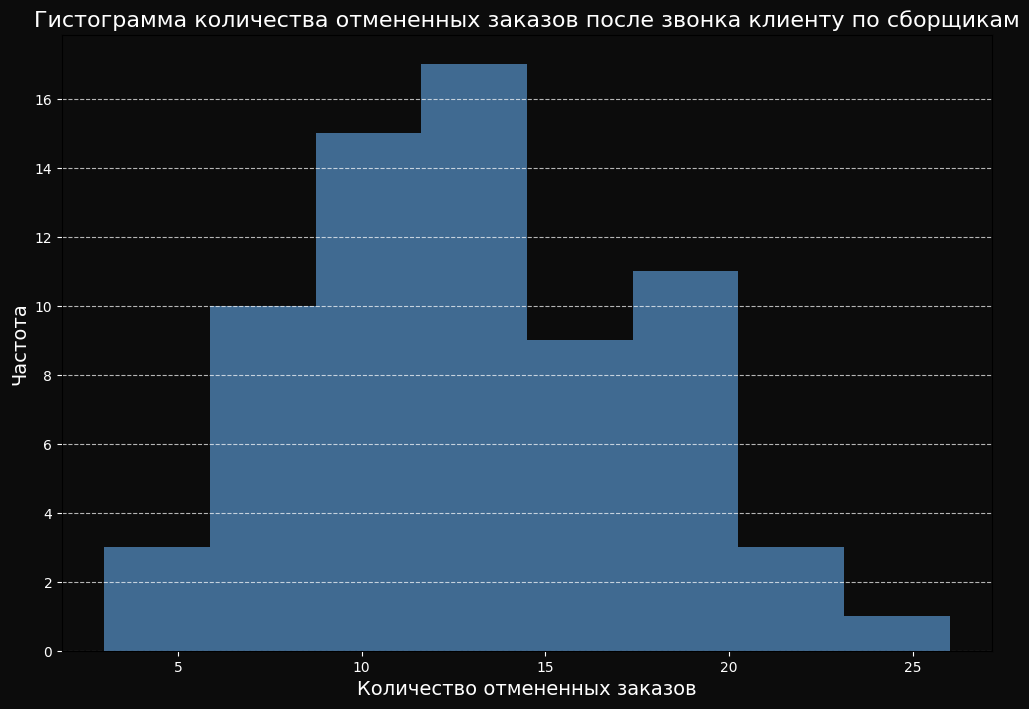

In [181]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 8))

fig.patch.set_facecolor('#0C0C0C')
ax.set_facecolor('#0C0C0C')

data = sorted_df[(sorted_df['stage'] == 'Звонок клиенту') & (sorted_df['next_stage'] == 'Отмена заказа')]['сборщики'].value_counts()

num_bins = 8


plt.hist(data, bins=num_bins, alpha=0.7, color='#5793CA')  
plt.xlabel('Количество отмененных заказов', color='white', fontsize=14)
plt.ylabel('Частота', color='white', fontsize=14)
plt.title('Гистограмма количества отмененных заказов после звонка клиенту по сборщикам', color='white', fontsize=16)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

plt.show()


In [182]:
import scipy.stats as stats

observed_data = data

statistic, p_value = stats.shapiro(observed_data)

print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0 - data is normally distributed)")
else:
    print("Sample does not look Gaussian (reject H0 - data is not normally distributed)")


Shapiro-Wilk Statistic: 0.9797652959823608
P-value: 0.325766384601593
Sample looks Gaussian (fail to reject H0 - data is normally distributed)


In [183]:
71*10*19988

14191480

In [184]:
1253+16617

17870

## Неэффективность Пин-понг

In [185]:
sorted_df[(sorted_df['stage'] == 'Сборка заказа') & (sorted_df['previous_stage'] == 'Поступление заказа сборщику') & (sorted_df['double_previous_stage'] == 'Сборка заказа') ]['duration'].sum() / 1160

Timedelta('0 days 00:23:46.862931034')

In [186]:
sorted_df[(sorted_df['stage'] == 'Поступление заказа сборщику') & (sorted_df['previous_stage'] == 'Сборка заказа') & (sorted_df['double_previous_stage'] == 'Поступление заказа сборщику') ]['duration'].sum() + sorted_df[(sorted_df['stage'] == 'Сборка заказа') & (sorted_df['previous_stage'] == 'Поступление заказа сборщику') & (sorted_df['double_previous_stage'] == 'Сборка заказа') ]['duration'].sum()

Timedelta('21 days 06:28:20')

In [187]:
sorted_df[(sorted_df['stage'] == 'Сборка заказа') & (sorted_df['previous_stage'] == 'Поступление заказа сборщику') & (sorted_df['double_previous_stage'] == 'Сборка заказа') ]['duration'].sum()

Timedelta('19 days 03:46:01')

In [188]:
(21*24*60+7*60)*10

306600